### **Project 2**
### **MARKETING DEPARTMENT**


* Marketing is crucial for the growth and sustainability of any business.
* Maketers can help build the compnayh's brand engaged customers grow revenue and increase sales
* One of the Key pain point for marketers is know their customers and identifiy their needs
* By understanding the customer marketing campaign is the tailored for their specific needs
* If the data about the customers is available data science can be applied to perform market sigmentation.
* In this case study you are working as a consultant to a bank in the NewYork city. The bank has extensive data about their customers for the past six months, the marketing team at the bank wanted to launch a targeted Ad marketing campaign by deviding the customers into at least threee distinctive groups.



**In this case study I have applied many skills, here are the main learning outcomes**
* Understand how to leverage the power of data science to perform market segmentation and transform marketing department.
* Perform exploratory data analysis and visulalize customer dataset usin g distplot, historgram and KDE.
* Learn how to Fill out missing data points(null elements)
* Understand the theory and intuition behind **K-Means** clustering algorithms.
* Learn how to find the optimal number of clusters using the elbow method.
* Apply K-Means algorithems in SciKit learn to perform market segmentation.
* Understand the theory and intiution behind autoencoders.
* Learn auto encodes to perform dimensionality reduction.
* Build and Train autoencoder model in Kearas.
* Understand the intuition behind principal components analysis (PCA).
* Apply PCA to perform dimensionality reduction using real world datasets.




### #TASK#1 **UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE**


1. **GROWTH**: Marketers empower business growth by reaching new customers.
2. **EDUCATION**: Marketers educate and communicate value proposition to customers.
3. **DRIVE SALES**:  Marketers drvie sales and traffic to products/Services.
4. **ENGAGEMENT**: Marketers engage customers and understand their needs.


### **Data Set Details Based on CSV File:** 

* **CUST_ID**: Identification of CrditCard Holder.
* **BALANCE**: Balance Amount Left in customer's account to make purchase.
* **BALANCE_FREQUENCY**: How frequently the balance is updated, score between 0 and 1 (1 = frequntly updated, 0 = not frequently updated).
* **PURCHASES**: Amount of purchases made from account.
* **ONEOFF_PURCHASES**:Maximum purchase amount done in one-go.
* **INSTALLMENTS_PURCHASES**:Amount of purchases done in installment. 
* **CASH_ADVANCE**: Case in advance given by the user.
* **PURCHASES_FREQUENCY**: How frequently the purchases are being made, score between 0 and 1 (1 = Frequently purchased, 0 = not frequently purchased).
* **ONEOFF_PURCHASES_FREQUENCY**:How frequently purchases in installments are being done( 1 =  frequently done, 0 = not frequently done)
* **PURCHASES_INSTALLMENTS_FREQUENCY**: How freqnetly purchases in installments are being done ( 1= frequently done, 0 = not frequently done)
* **CASH_ADVANCE_FREQUENCY**: How freqently the cash in advanced being paid.
* **CASH_ADVANCE_TRX**: Number of Transactions made with "Cash in Advance" 
* **PURCHASES_TRX**: Number of purchases transations made.
* **CREDIT_LIMIT**: Limit of CreditCard for user. 
* **PAYMENTS**: Amount of Payment done by the user. 
* **MINIMUM_PAYMENTS**: Minimum amount of payments made by user. 
* **PRC_FULL_PAYMENT**: Percent of full payment paid by user. 
* **TENURE**: Tensure of CreditCard service for user. 


In [ ]:
# Import Required Libraries and Datasets
import pandas as pd
import numpy as np
import seaborn as sns #For Data Visualization
import matplotlib.pyplot as plt # For Data Visualization
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
CreditCard_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScienceProjects/MarketingDepartment/Marketing_data.csv')

In [ ]:
CreditCard_df

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0     C10001    40.900749  ...          0.000000      12
1     C10002  3202.467416  ...          0.222222      12
2     C10003  2495.148862  ...          0.000000      12
3     C10004  1666.670542  ...          0.000000      12
4     C10005   817.714335  ...          0.000000      12
...      ...          ...  ...               ...     ...
8945  C19186    28.493517  ...          0.500000       6
8946  C19187    19.183215  ...          0.000000       6
8947  C19188    23.398673  ...          0.250000       6
8948  C19189    13.457564  ...          0.250000       6
8949  C19190   372.708075  ...          0.000000       6

[8950 rows x 18 columns]

In [ ]:
CreditCard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
CreditCard_df.describe()
# Mean balance is ~$1564
# Balance frequency is freqently updated on average ~0.9
# Purchases average is ~$1000
# One Off Purchases average is ~$600
# Average Purchases frequency is around 0.5
# Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY and CASH_ADVANCE_FREQUENCY are generally low
# Average Credit Limit ~4500
# Percent of full payment is 15%
# Average Tensure is ~11 


BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT       TENURE
count   8950.000000        8950.000000  ...       8950.000000  8950.000000
mean    1564.474828           0.877271  ...          0.153715    11.517318
std     2081.531879           0.236904  ...          0.292499     1.338331
min        0.000000           0.000000  ...          0.000000     6.000000
25%      128.281915           0.888889  ...          0.000000    12.000000
50%      873.385231           1.000000  ...          0.000000    12.000000
75%     2054.140036           1.000000  ...          0.142857    12.000000
max    19043.138560           1.000000  ...          1.000000    12.000000

[8 rows x 17 columns]

In [ ]:
# Let's see who made one off purchase of $40761.250000
CreditCard_df[CreditCard_df['ONEOFF_PURCHASES'] == 40761.250000]

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
550  C10574  11547.52001  ...              0.25      12

[1 rows x 18 columns]

In [ ]:
# Let's see who used CASH_ADVANCE of $47137
CreditCard_df[CreditCard_df['CASH_ADVANCE'] >= 47137.21176]

# This customer made 123 Cash Advance Transactions!!
# Neve paid Credit Card in Full 

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
2159  C12226  10905.05381  ...               0.0      12

[1 rows x 18 columns]

### Task#3: **VISULIZE AND EXPLORE DATASET**


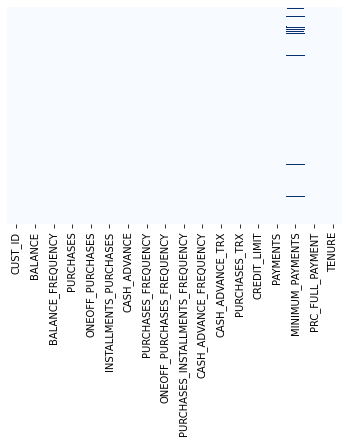

In [ ]:
#Let's see if we have any missing data
sns.heatmap(CreditCard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [ ]:
# There are bunch of NULL values
# Let's get all NULL Count
CreditCard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Let's Fill up missing elements with mean of the 'MINIMUM_PAYMENT'
CreditCard_df.loc[(CreditCard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = CreditCard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
CreditCard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Let's fill up the missing element with mean of CREDIT_LIMIT
CreditCard_df.loc[(CreditCard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = CreditCard_df['CREDIT_LIMIT'].mean()

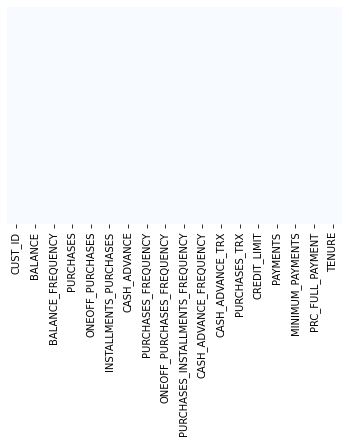

In [ ]:
# Let's run the same heatmap command to check null values ride off or not
sns.heatmap(CreditCard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [ ]:
# Let's see if we have duplicated entries in the data
CreditCard_df.isnull().sum

<bound method DataFrame.sum of       CUST_ID  BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0       False    False  ...             False   False
1       False    False  ...             False   False
2       False    False  ...             False   False
3       False    False  ...             False   False
4       False    False  ...             False   False
...       ...      ...  ...               ...     ...
8945    False    False  ...             False   False
8946    False    False  ...             False   False
8947    False    False  ...             False   False
8948    False    False  ...             False   False
8949    False    False  ...             False   False

[8950 rows x 18 columns]>

In [ ]:
# Let's drop Customer ID, since is has no meaning here
CreditCard_df.drop('CUST_ID', axis= 1, inplace= True)


In [ ]:
CreditCard_df.head()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]

In [ ]:
# Let's check the length of the dataframe columns
length = len(CreditCard_df.columns)

In [ ]:
length

17

In [ ]:
# Display columns names
CreditCard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### **Visualization Process**
* **Distplot combines the matplotlib.hist function with Seaborn kdeplot()**
* **KDE plot represents the "Kernal Density Estimate"**
* **KDE is used for visualizing the Probability Density of a Continuous Variable**
* **KDE demonstrates the Probability density at different values in a continuous variable.**




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

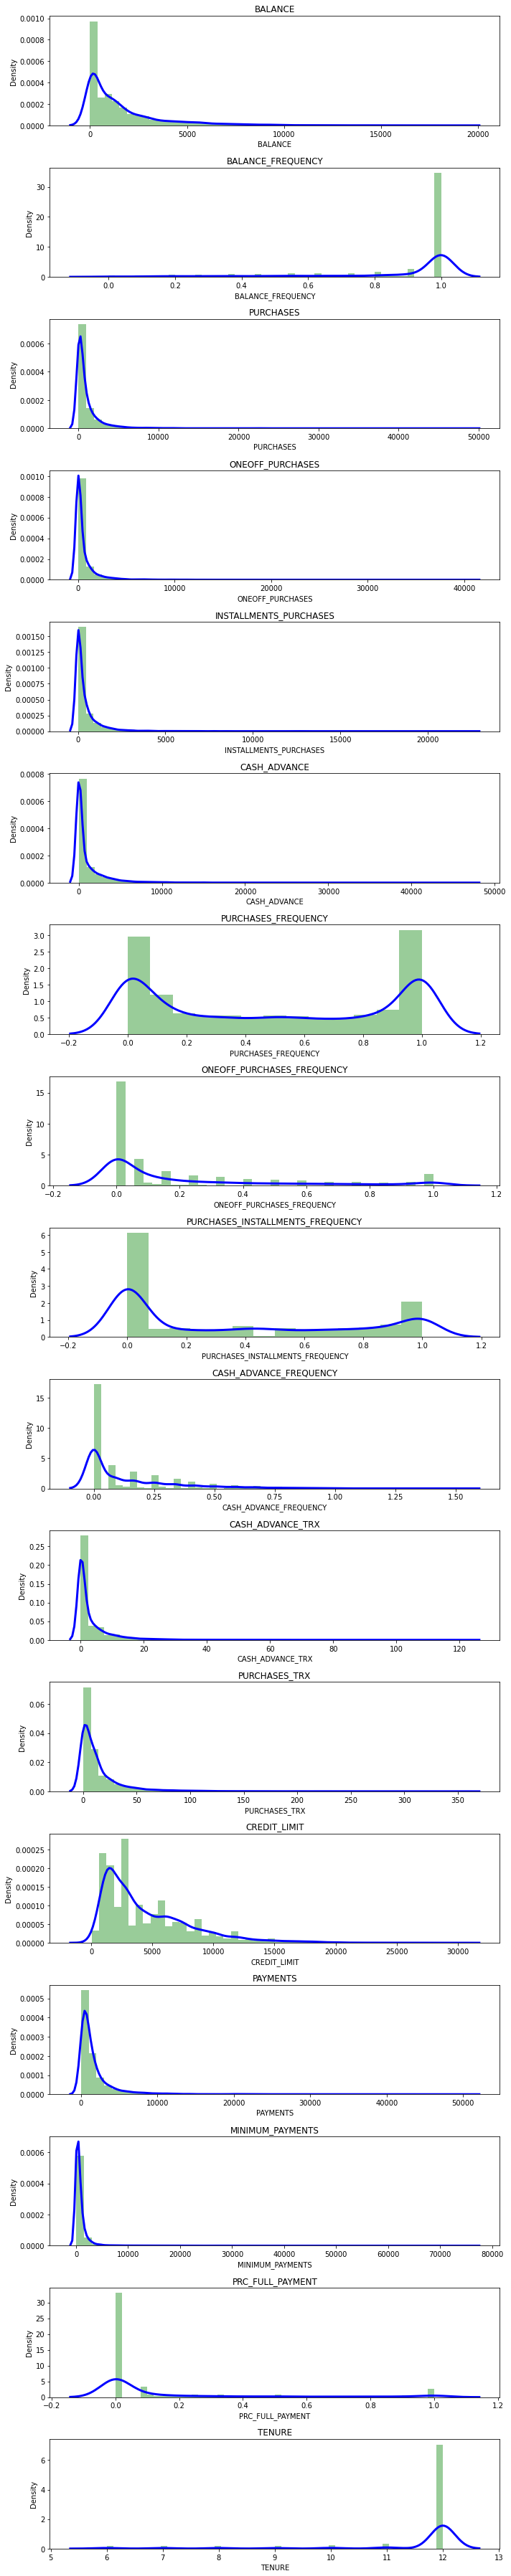

In [ ]:
plt.figure(figsize= (10, 50))
for i in range(len(CreditCard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(CreditCard_df[CreditCard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color":"g"})
  #sns.distplot(CreditCard_df[CreditCard_df.columns[i]], kde = True, hist = True, hist_kws={'color':'g'})
  #sns.distplot(data1, kde=True, hist=True, hist_kws={"range": [0,10]})
  plt.title(CreditCard_df.columns[i])

plt.tight_layout()

**Analysis:**

* Mean of balance is 1500
* BALANCE_FREQUENCY for most customers is updated frequently 1
* For 'PURCHASES_FREQUENCY' there are two distinct group of customers
* For "ONEOFF_PURCHASES_FREQUENCY" and "PURCHASES_INSTALLMENTS_FREQUENCY" most user don't do one of the purchase or installment purches frequently.
* Very small number of customers pay their balance in full "PRC_FULL_PAYMENT" 
* Credit limit average is around ~$4500
* Most customers are 11 years tensure

<Figure size 720x3600 with 0 Axes>

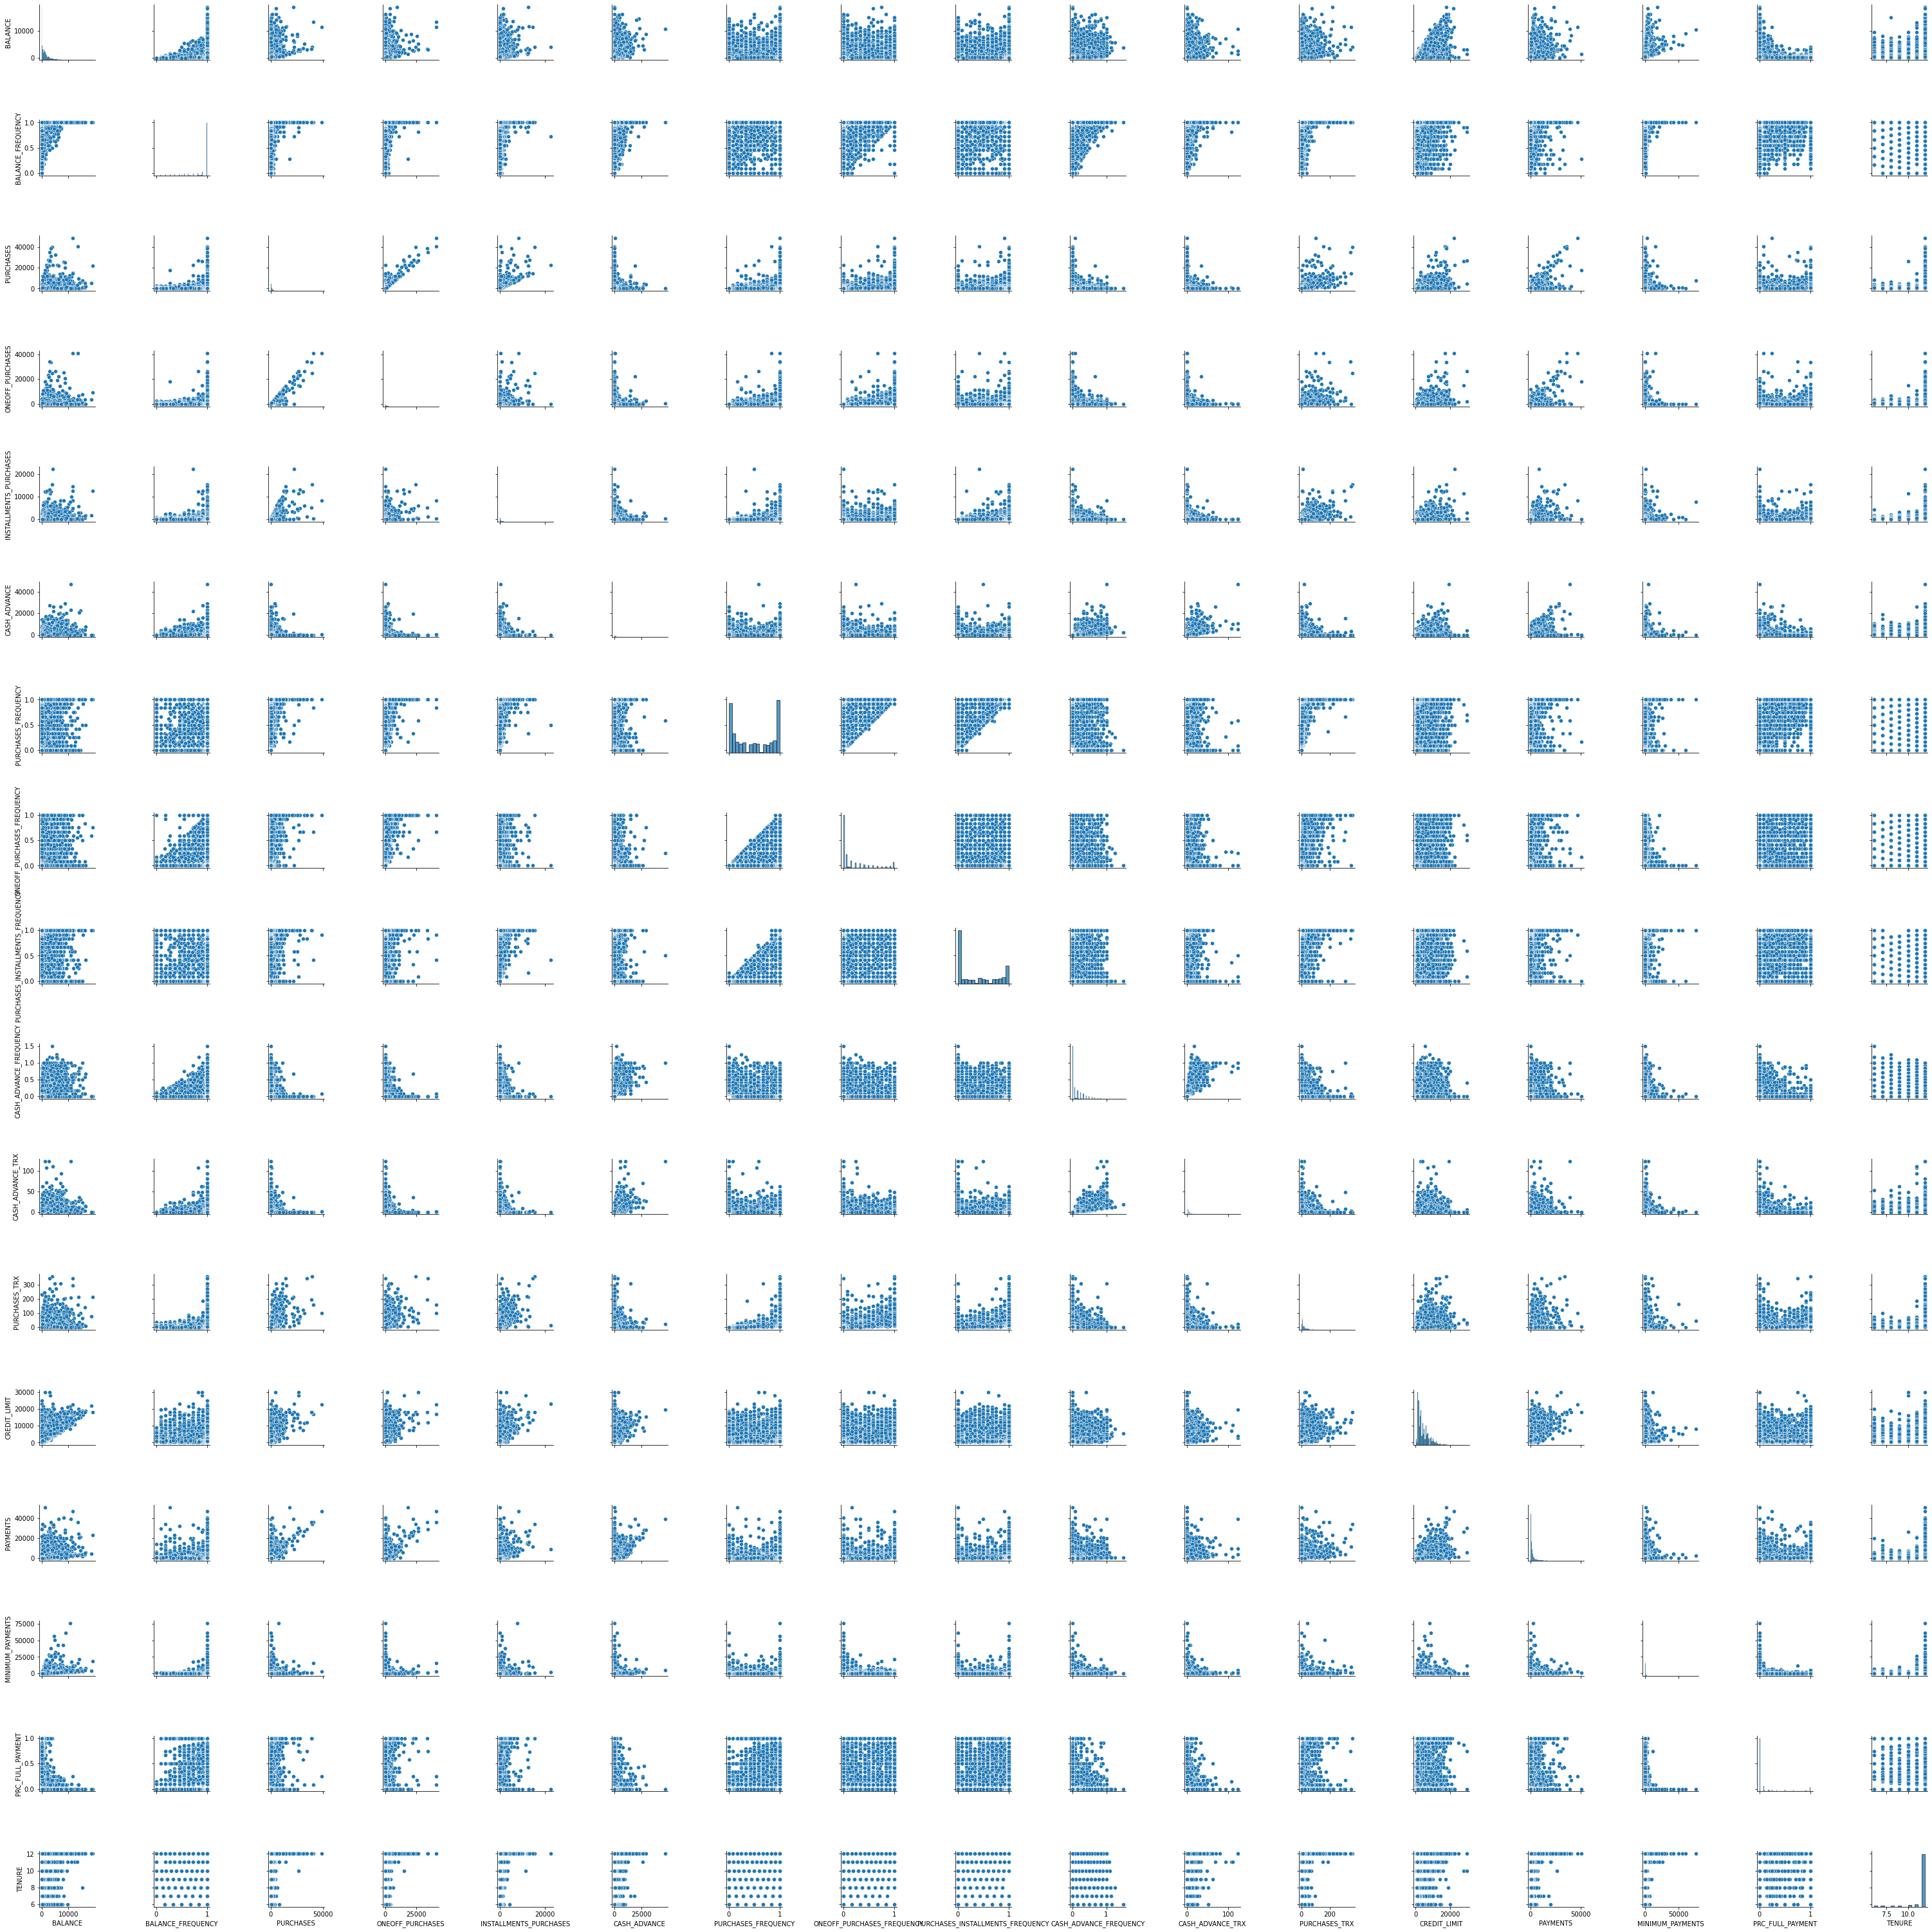

In [ ]:
     #plt.figure(figsize= (10, 50))
     #sns.pairplot(CreditCard_df)
     #plt.show()

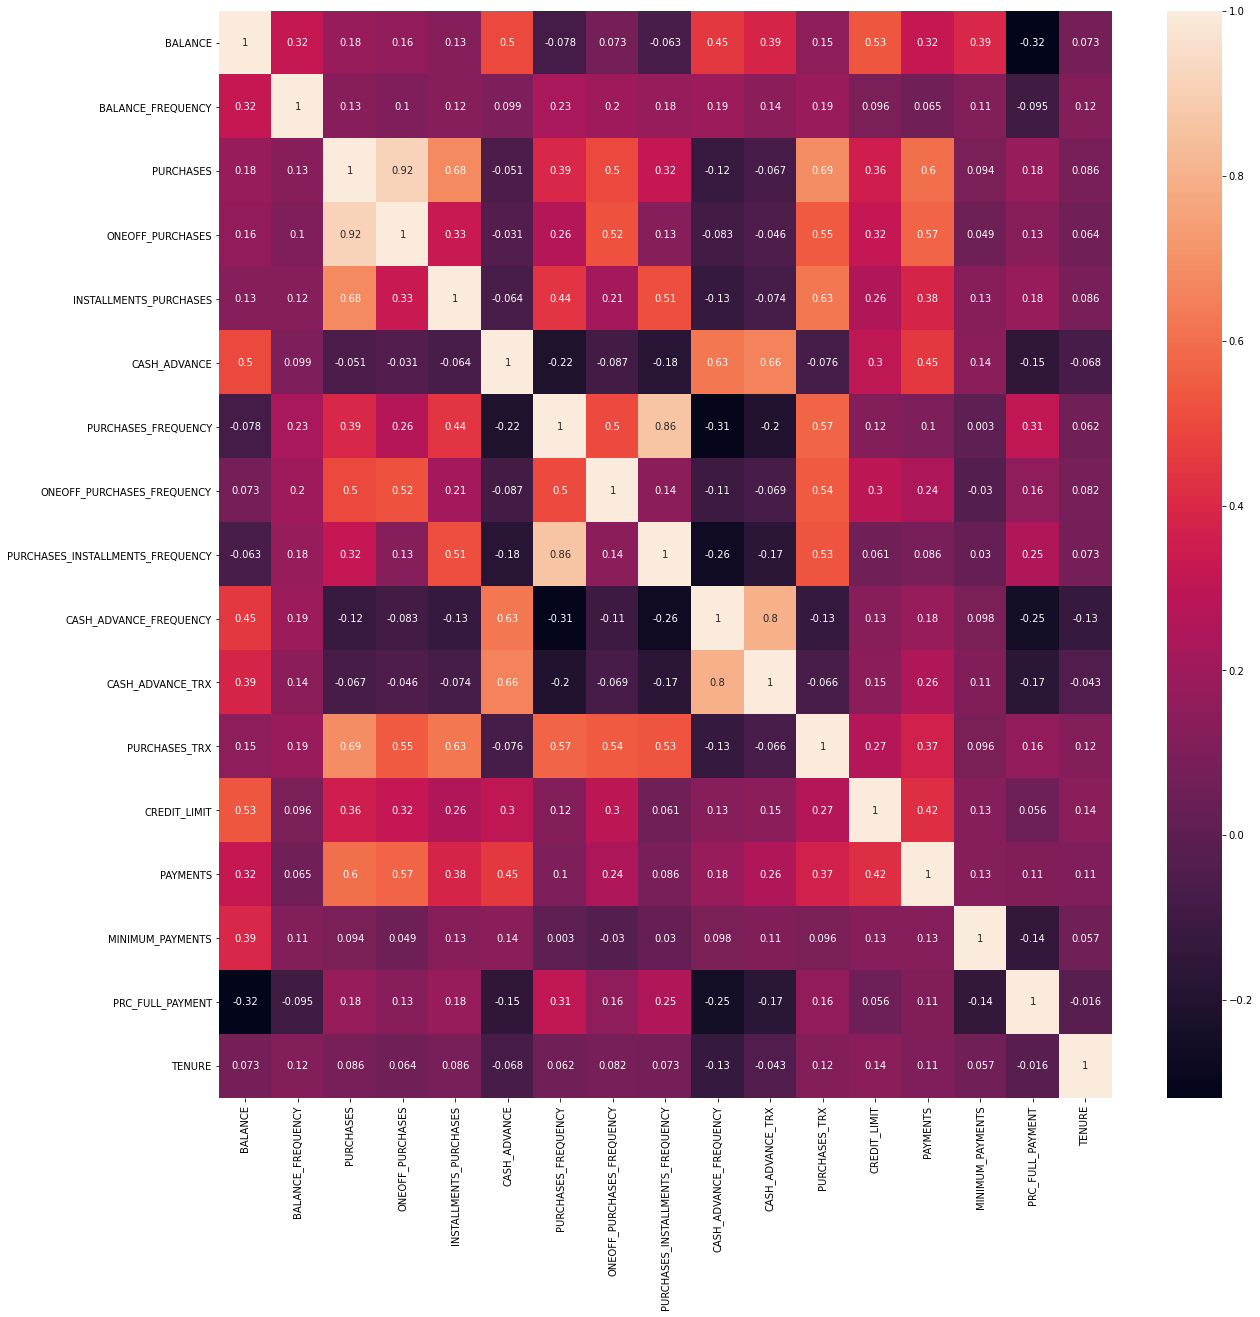

In [ ]:
# Correlation between "PURCHASE" and "ONEOFF_PURCHASE" & "INSTALMENT_PURCHASES"
# Trend between "PURCHASES", "CREDIT_LIMIT" and "PAYMENTS"
correlations = CreditCard_df.corr()
f, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(correlations, annot=True)


In [ ]:
# Analysis
# "PURCHASES" have high correlation between ONOFF_PURCHASES, INSTALLMENT_PURCHASES, PURCHASES_TRX credit limit and payments
# Strong positive correlation between "PUCHASES_FREQUENCY" and "PURCHASES_INSTALLMENT_FREQUENCY"

###**TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS**

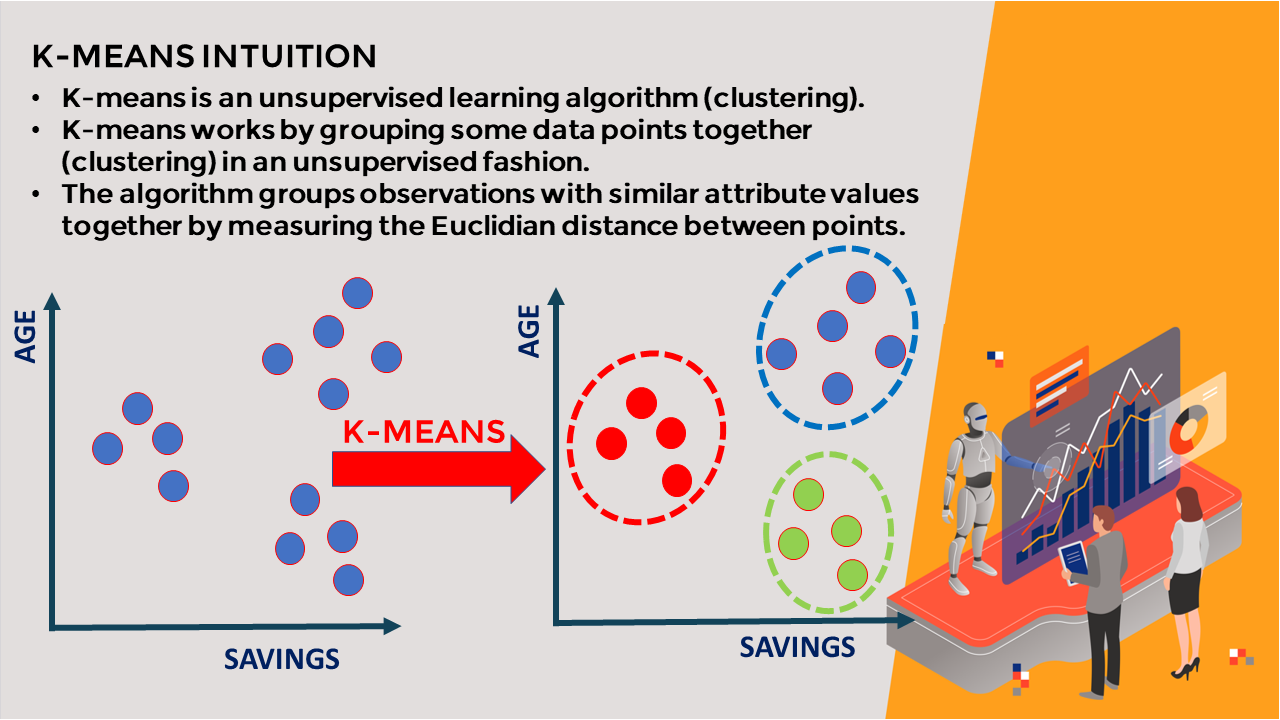

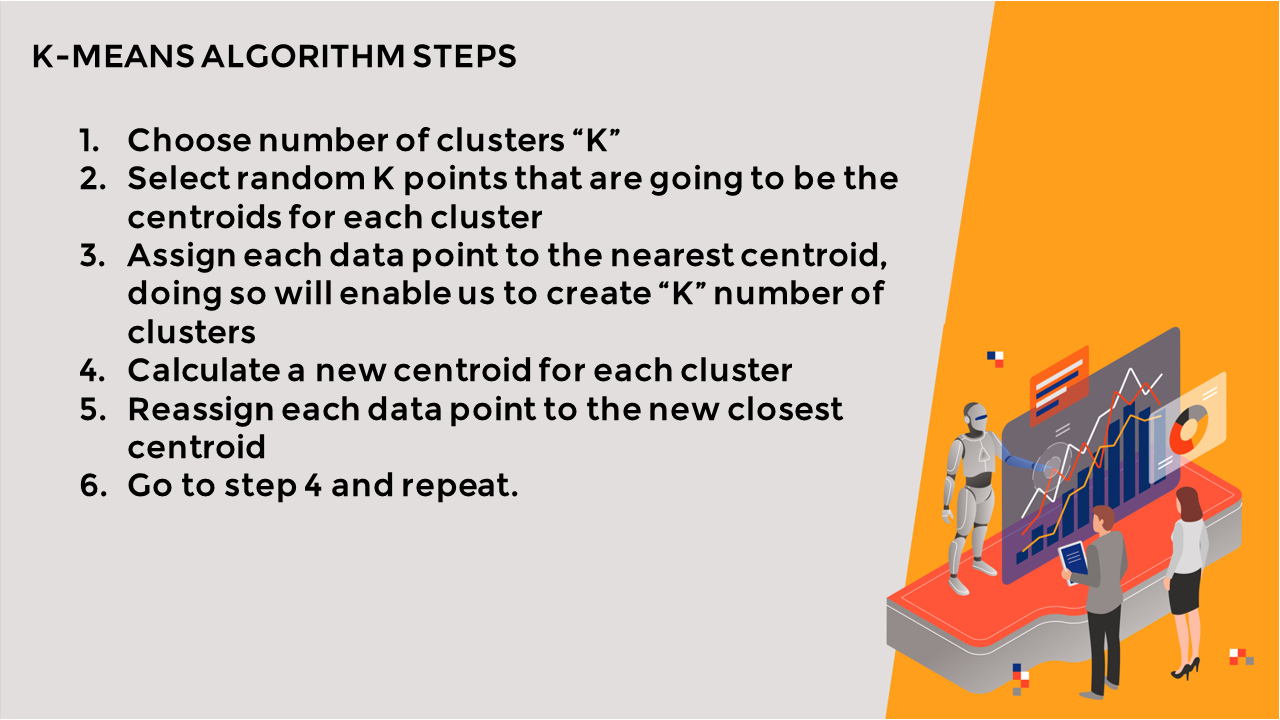

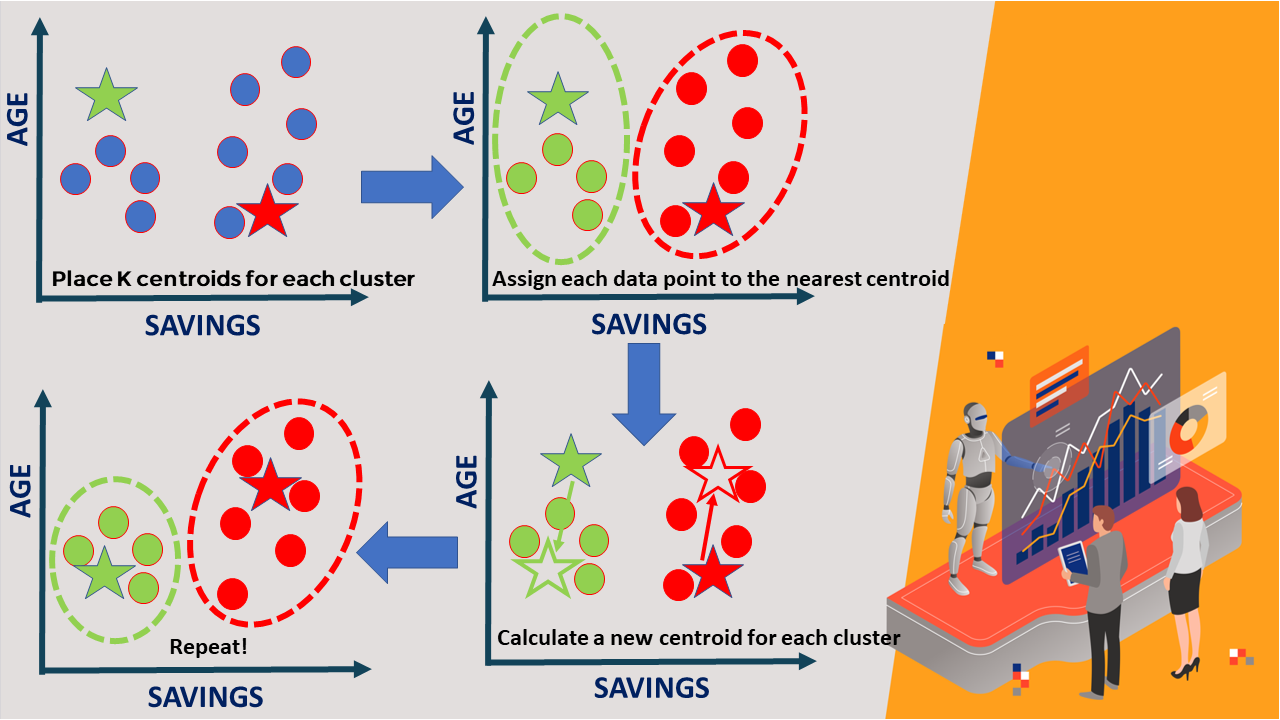

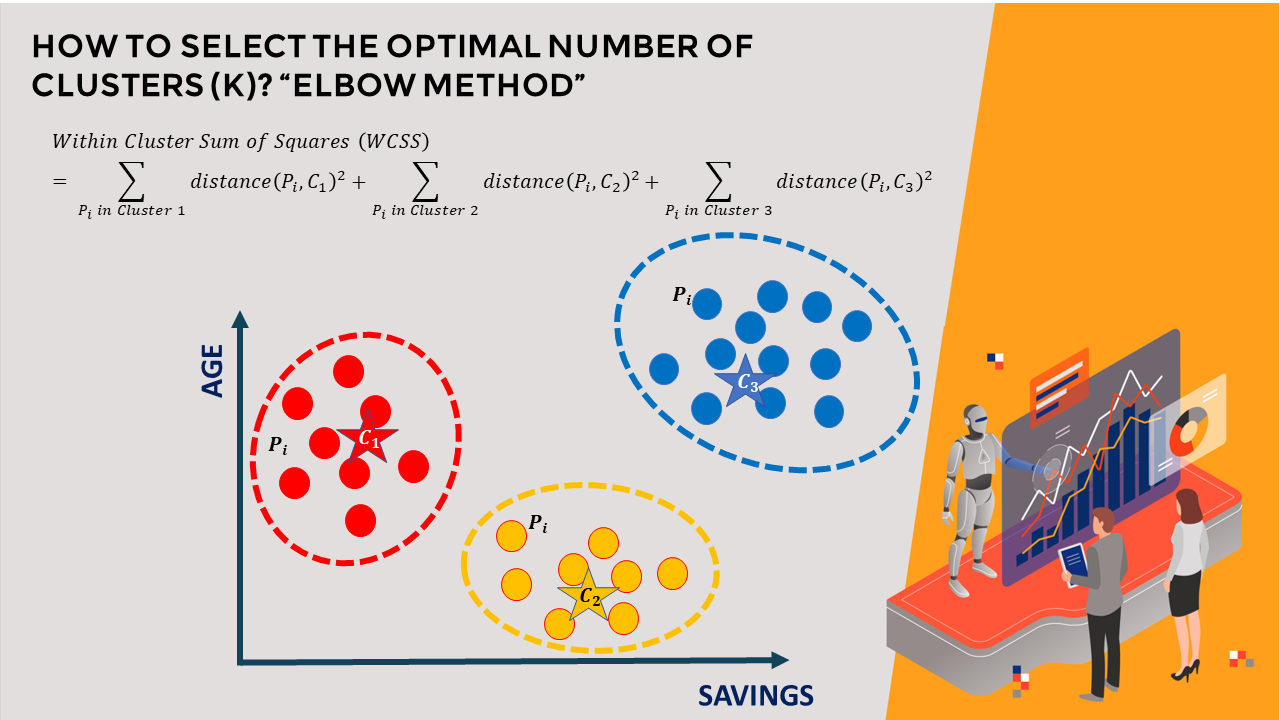

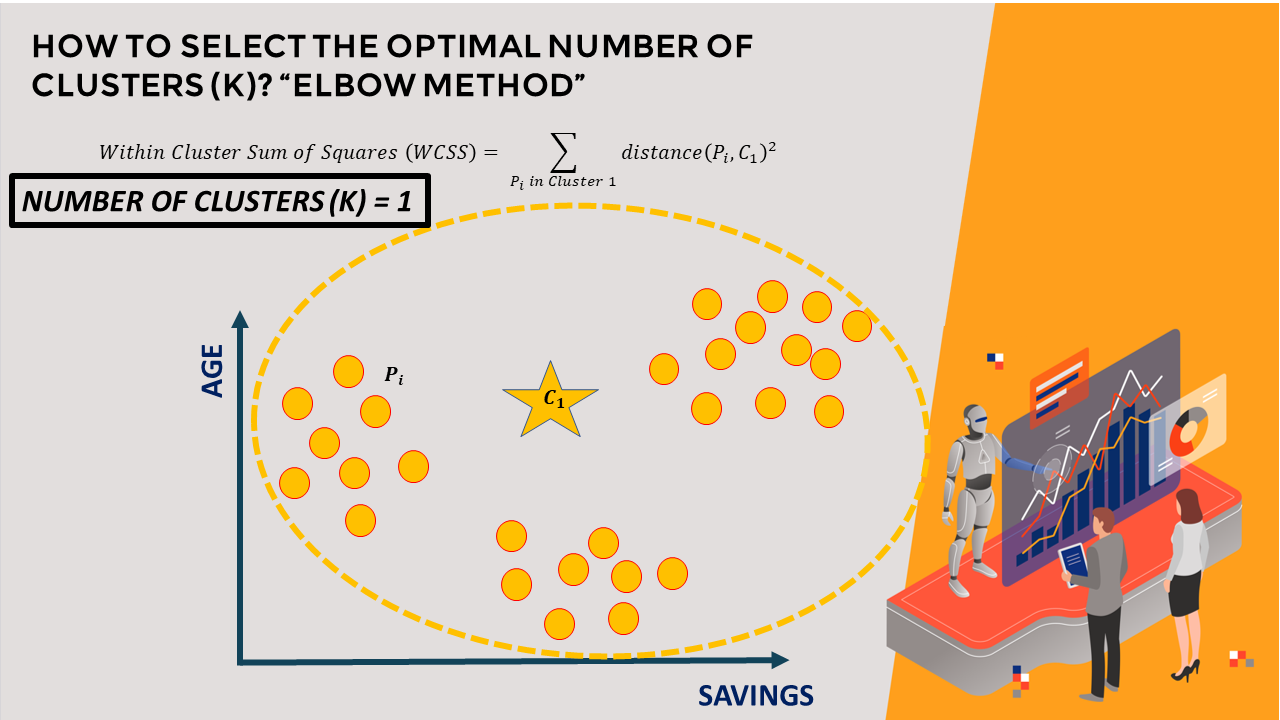

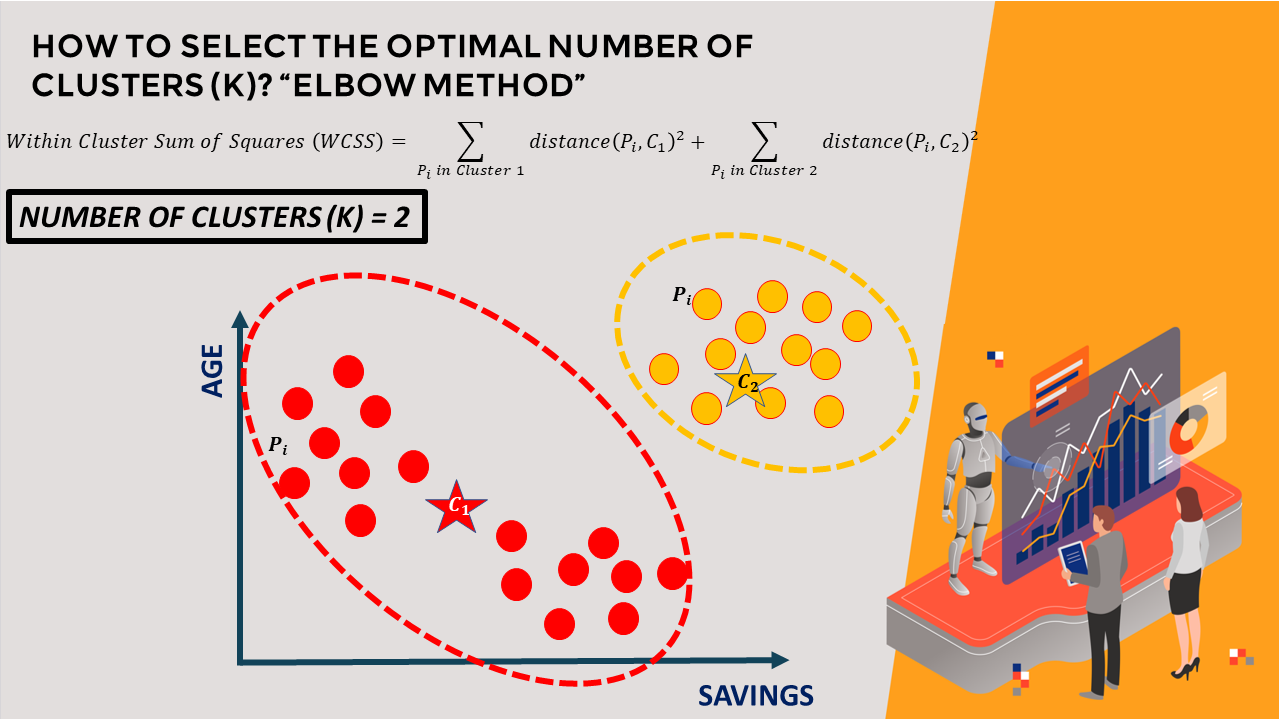

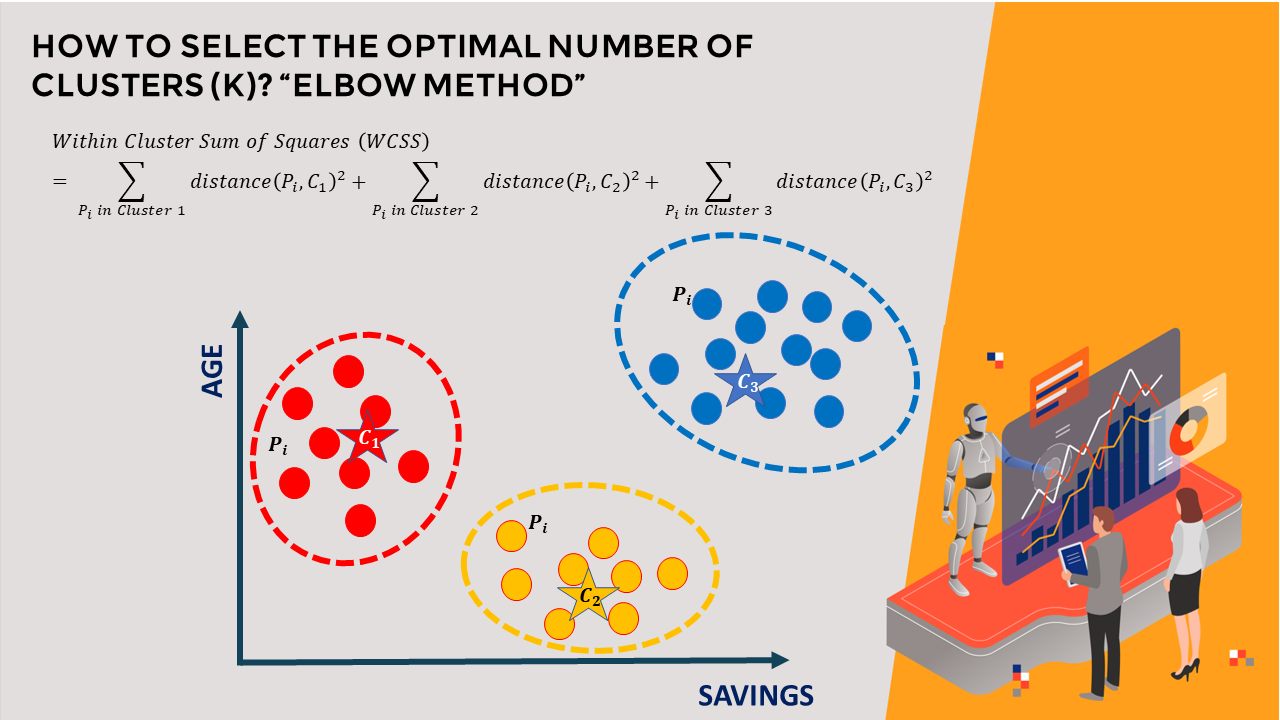

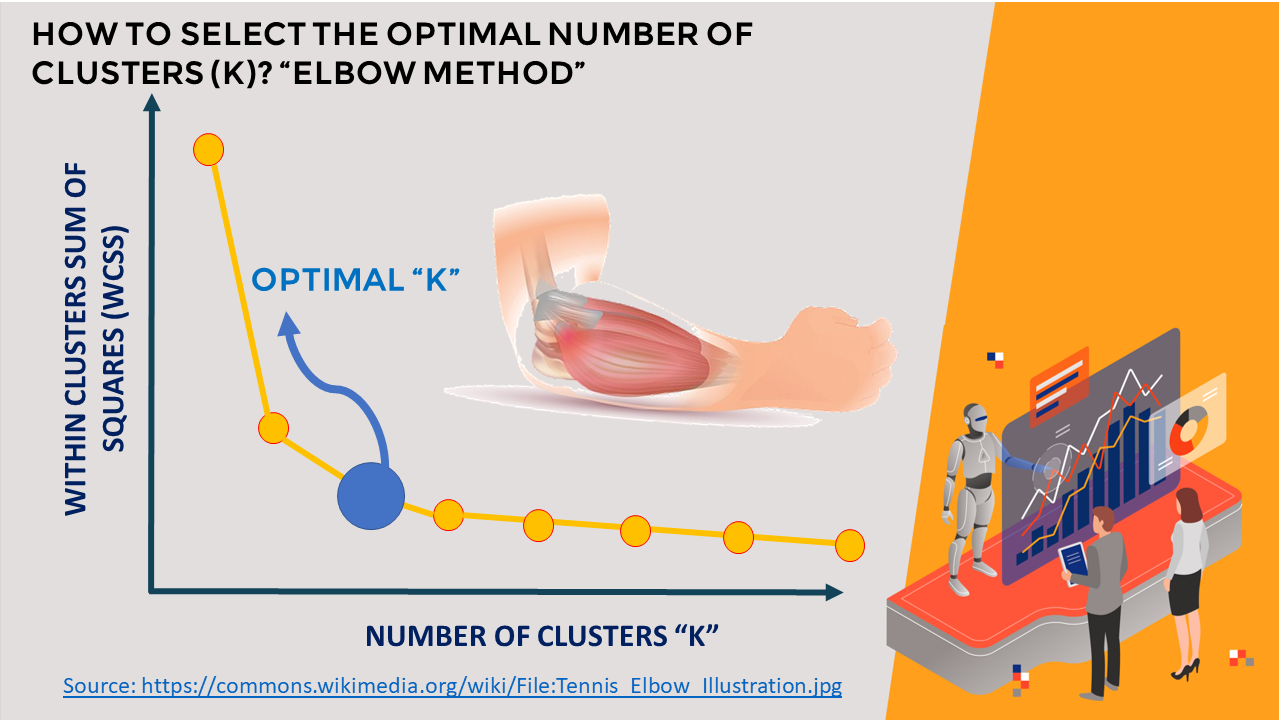

TASK #5: **FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD**

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
# Let's Scale the data first
scaler = StandardScaler()
CreditCard_df_scaled = scaler.fit_transform(CreditCard_df)


In [ ]:
CreditCard_df_scaled.shape

(8950, 17)

In [ ]:
CreditCard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

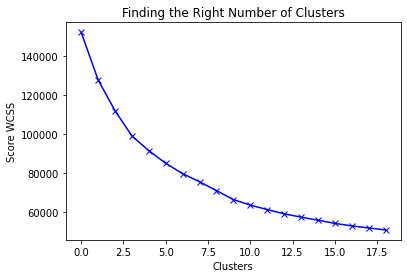

In [ ]:
# Let's draw our Elbow or Apply our Elbow method
# Noe we need to create a plot between the SCs and between the number of clusters
# Let's create an empty score
scores_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(CreditCard_df_scaled)
    scores_1.append(kmeans.inertia_)

# Let's plot the culsters
plt.plot(scores_1, 'bx-')
plt.title("Finding the Right Number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("Score WCSS")
plt.show()


In [ ]:
# Analysis

# From above we can obsorve that, 4th cluster seems to be formin gthe elbow of the curve
# However, the values does not reduce linearly unitl 8th cluster
# Let's choose the number of cluster to be 7

### **TASK#6** APPLY K-MEANS METHOD 
* **Part-I**: 

In [ ]:
kmeans = KMeans(8)
kmeans.fit(CreditCard_df_scaled)
labels = kmeans.labels_


In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
labels

array([5, 4, 6, ..., 1, 5, 2], dtype=int32)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [CreditCard_df.columns])


In [ ]:
cluster_centers

BALANCE BALANCE_FREQUENCY  ... PRC_FULL_PAYMENT    TENURE
0  1.180370          0.465753  ...        -0.525551  0.292749
1 -0.398027          0.307438  ...         0.357726 -0.026014
2 -0.698229         -2.132395  ...         0.250288 -0.163367
3  1.012874          0.464529  ...         0.261577  0.337784
4  1.586622          0.374051  ...        -0.390223 -0.098604
5 -0.006326          0.371255  ...        -0.454481 -0.009476
6 -0.118721          0.394865  ...         0.398756  0.203463
7  1.845310          0.340595  ...         1.222264  0.298409

[8 rows x 17 columns]

In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [CreditCard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  ... PRC_FULL_PAYMENT     TENURE
0  4021.314923          0.987603  ...    -8.326673e-17  11.909091
1   736.015400          0.950100  ...     2.583433e-01  11.482505
2   111.170530          0.372126  ...     2.269195e-01  11.298691
3  3672.686772          0.987313  ...     2.302215e-01  11.969359
4  4866.895196          0.965880  ...     3.958097e-02  11.385361
5  1551.308644          0.965218  ...     2.078665e-02  11.504638
6  1317.366577          0.970811  ...     2.703439e-01  11.789604
7  5405.330935          0.957955  ...     5.112058e-01  11.916667

[8 rows x 17 columns]

In [ ]:
# Data Analysis:

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
y_kmeans = kmeans.fit_predict(CreditCard_df_scaled)
y_kmeans

array([2, 1, 0, ..., 7, 7, 7], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
CreditCard_df_cluster = pd.concat([CreditCard_df, pd.DataFrame({'CLUSTER':labels})], axis = 1)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  PRC_FULL_PAYMENT  TENURE  CLUSTER
0    40.900749           0.818182      95.40  ...          0.000000      12        5
1  3202.467416           0.909091       0.00  ...          0.222222      12        4
2  2495.148862           1.000000     773.17  ...          0.000000      12        6
3  1666.670542           0.636364    1499.00  ...          0.000000      12        5
4   817.714335           1.000000      16.00  ...          0.000000      12        5

[5 rows x 18 columns]

In [ ]:
CreditCard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  PRC_FULL_PAYMENT  TENURE  CLUSTER
0    40.900749           0.818182      95.40  ...          0.000000      12        5
1  3202.467416           0.909091       0.00  ...          0.222222      12        4
2  2495.148862           1.000000     773.17  ...          0.000000      12        6
3  1666.670542           0.636364    1499.00  ...          0.000000      12        5
4   817.714335           1.000000      16.00  ...          0.000000      12        5

[5 rows x 18 columns]

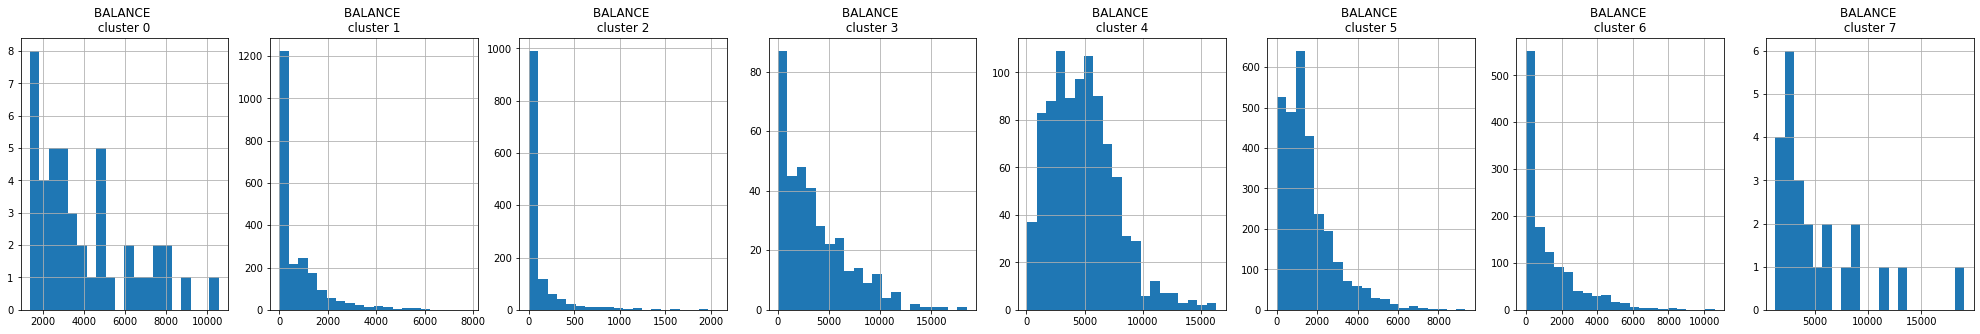

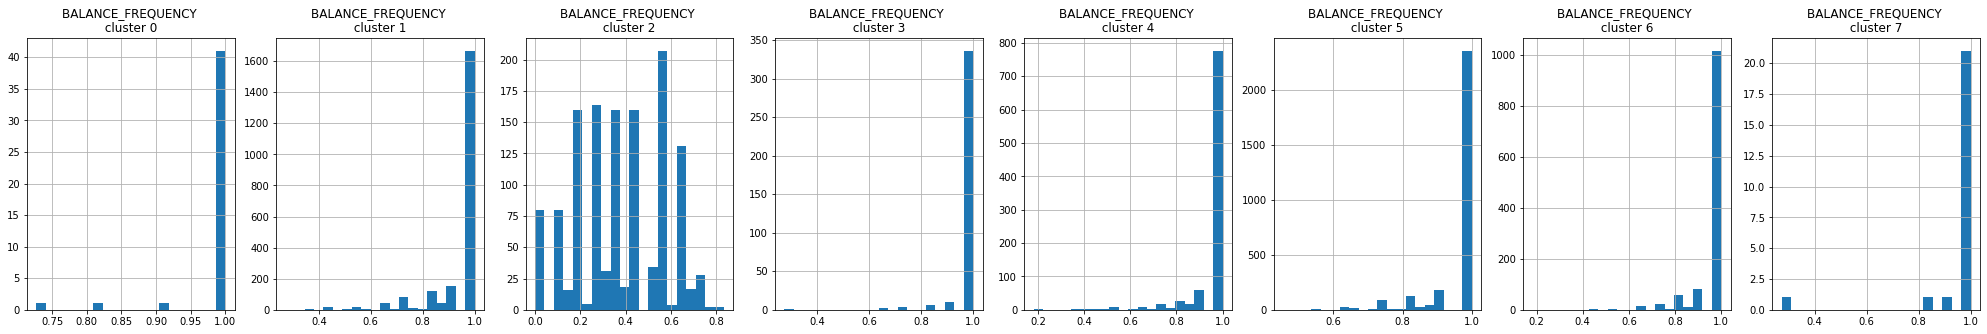

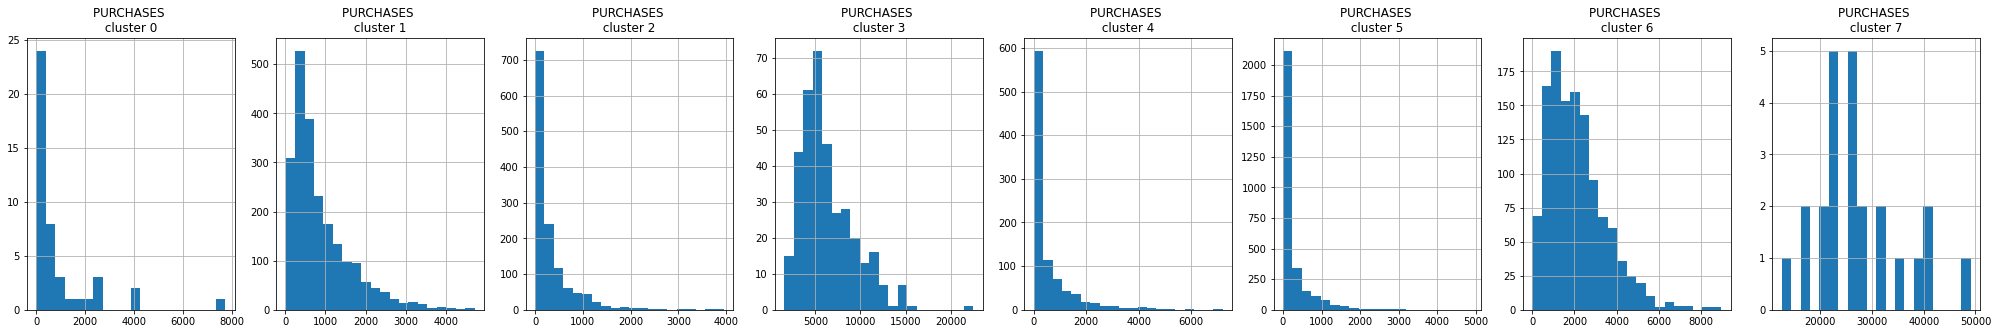

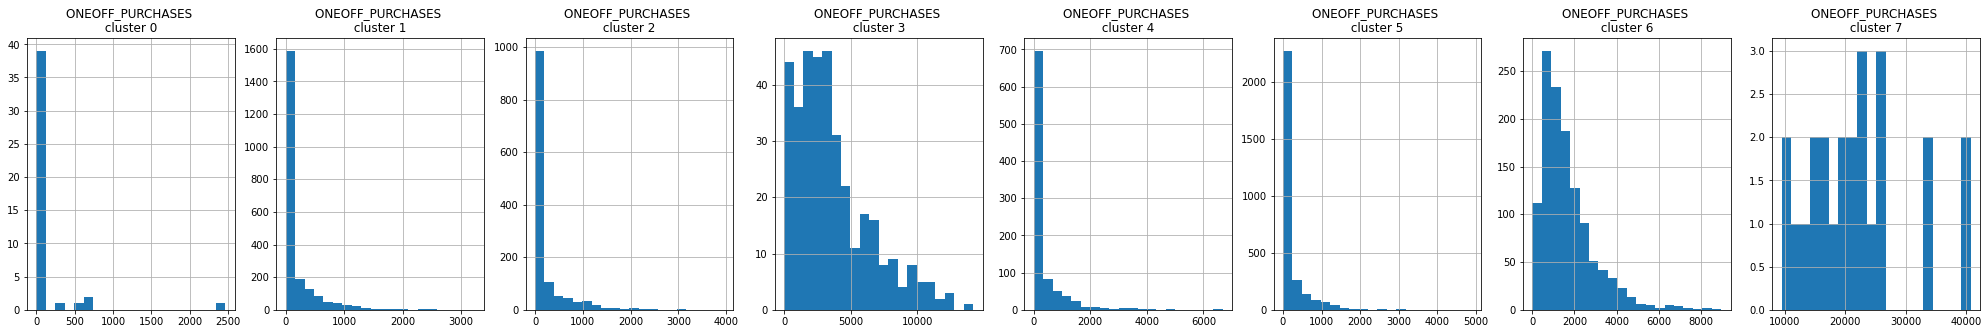

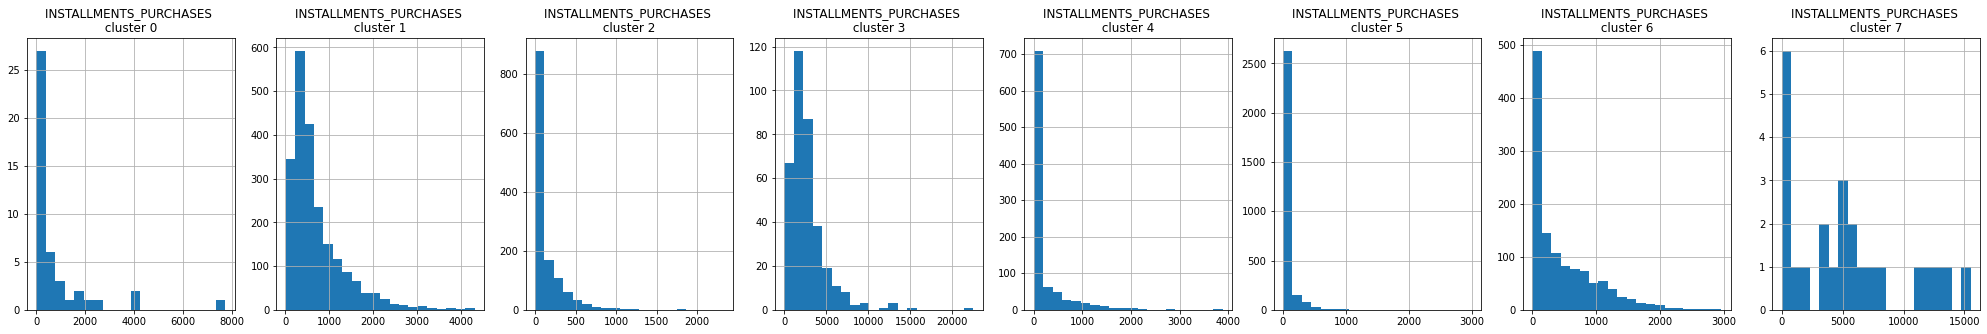

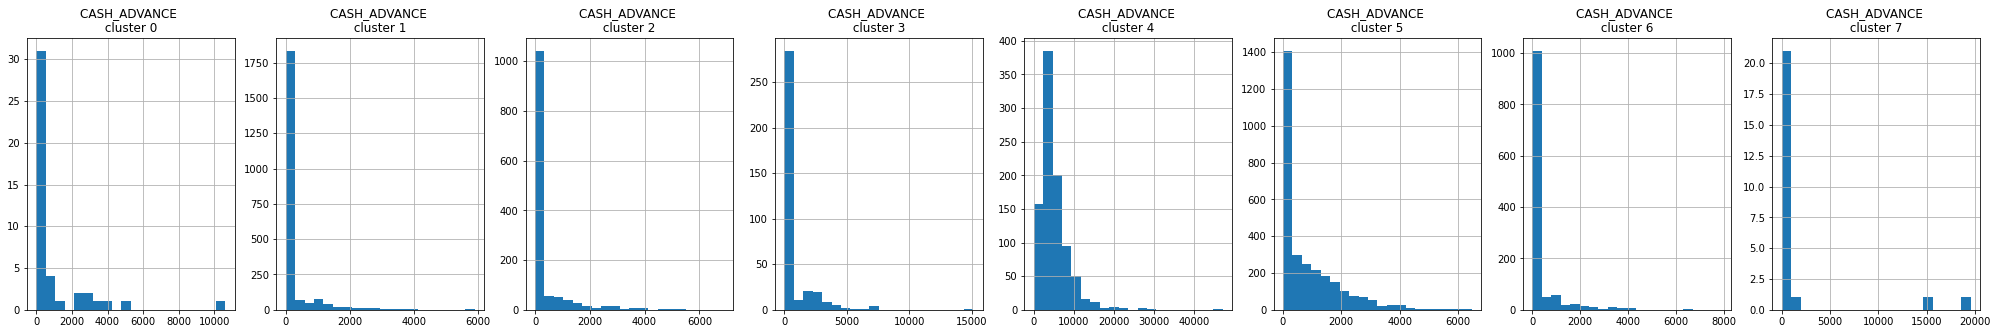

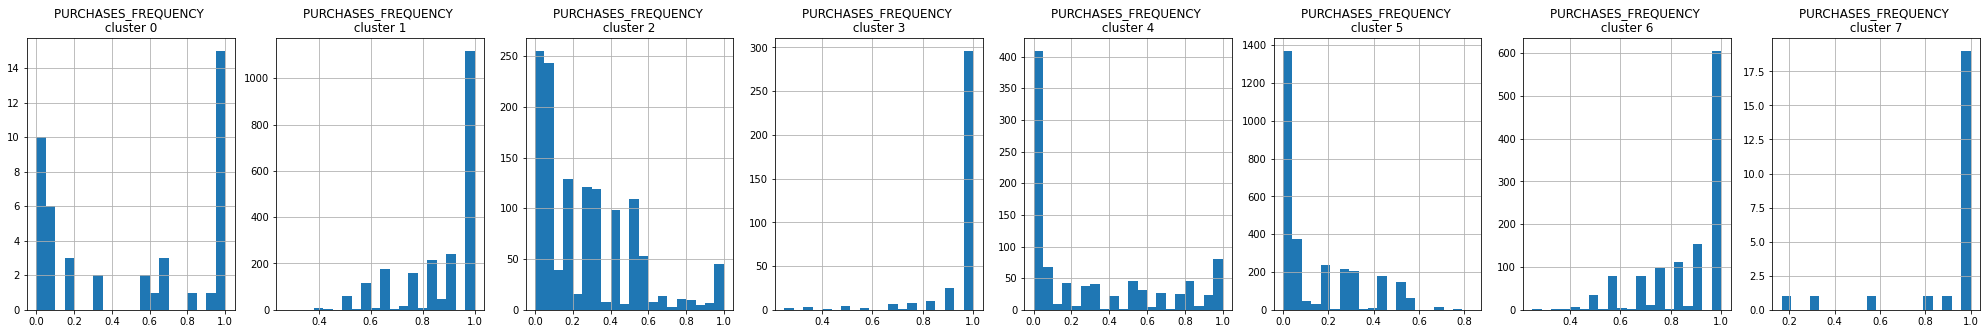

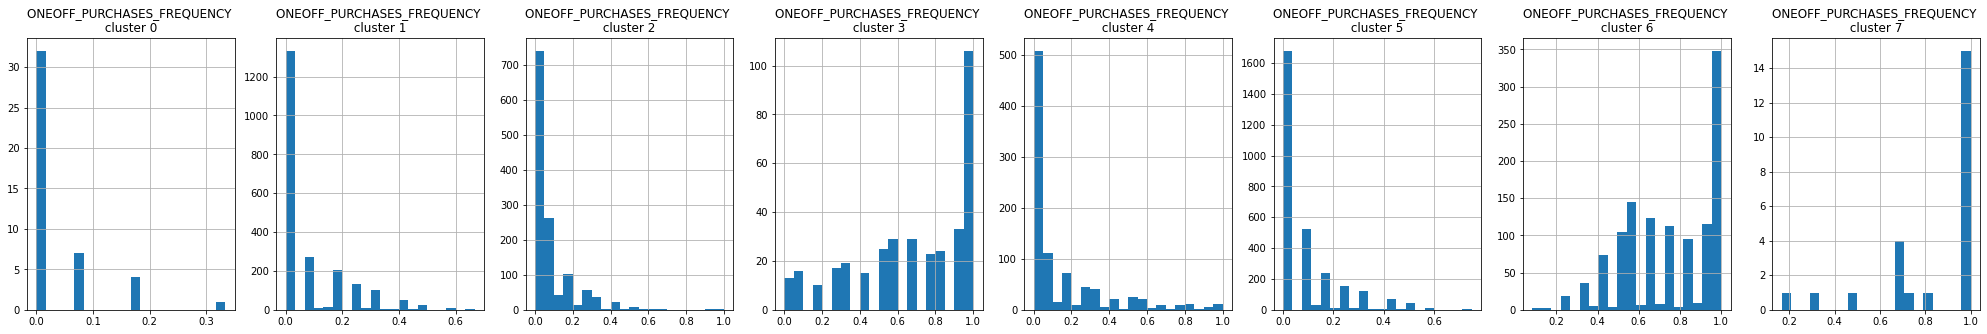

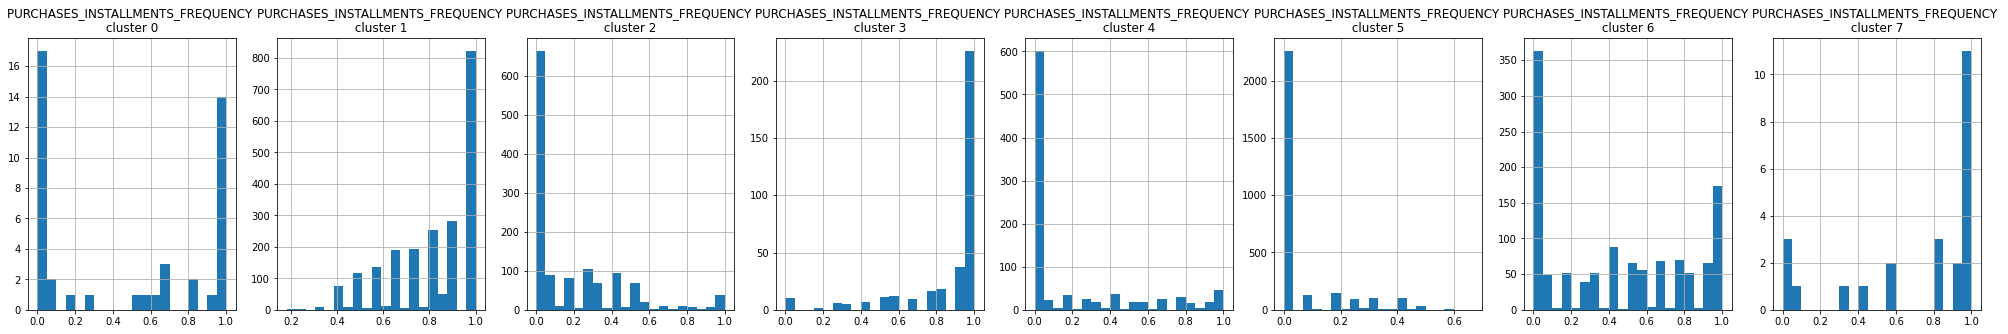

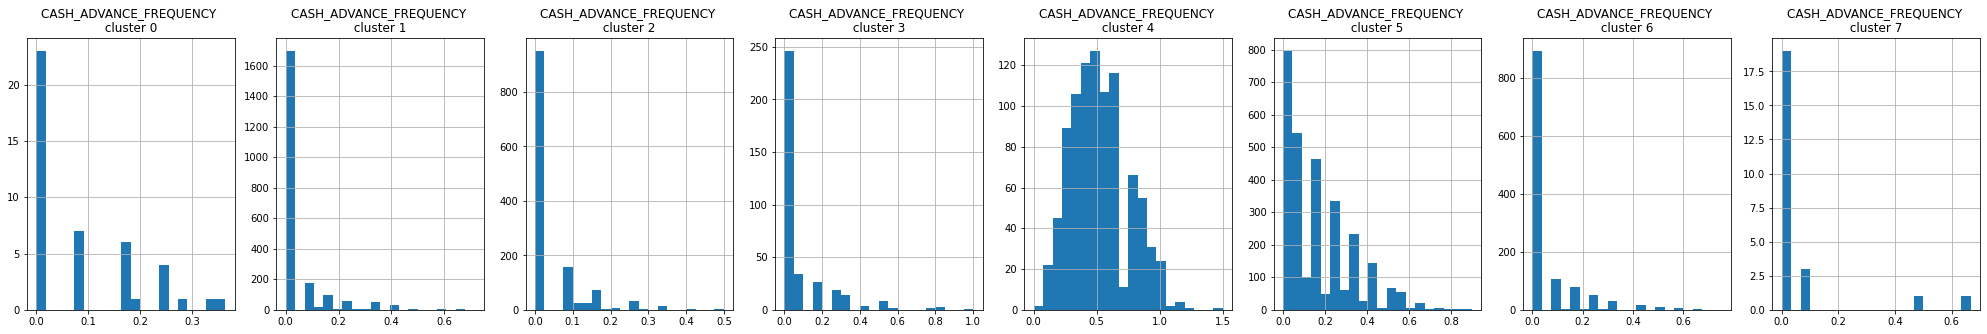

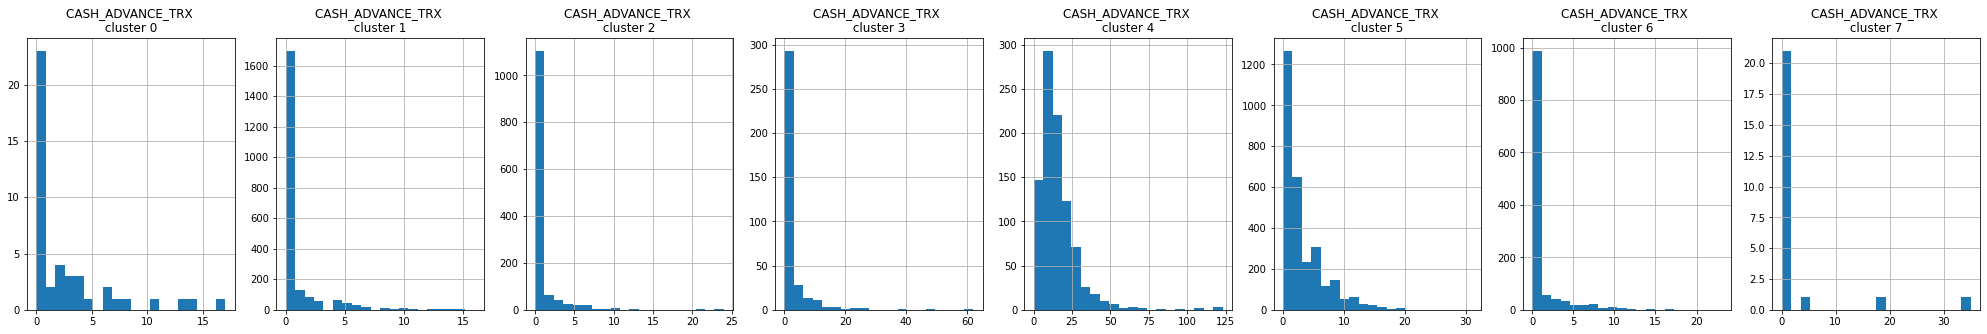

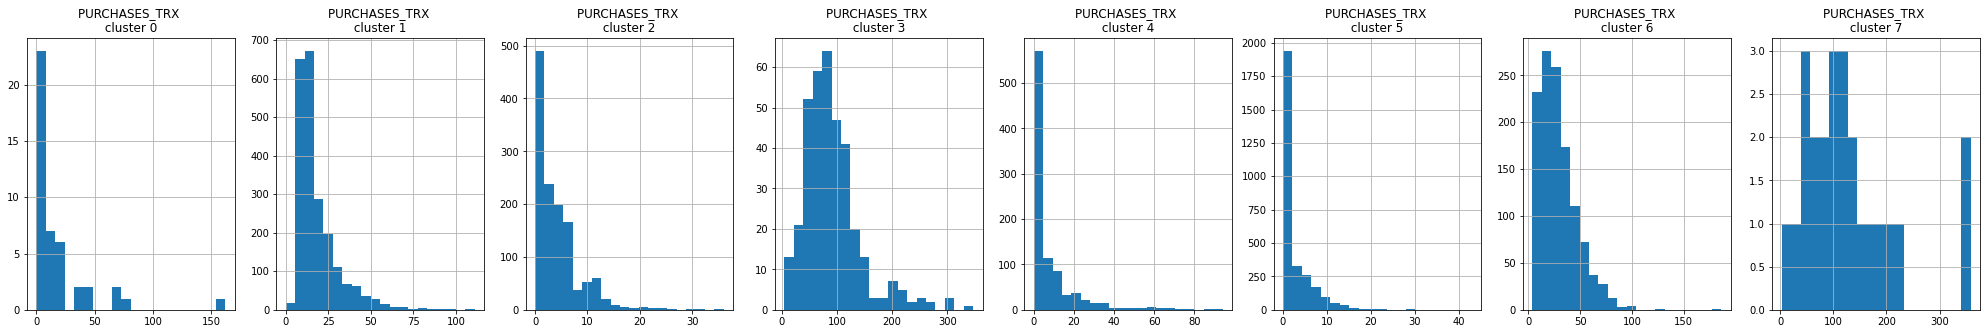

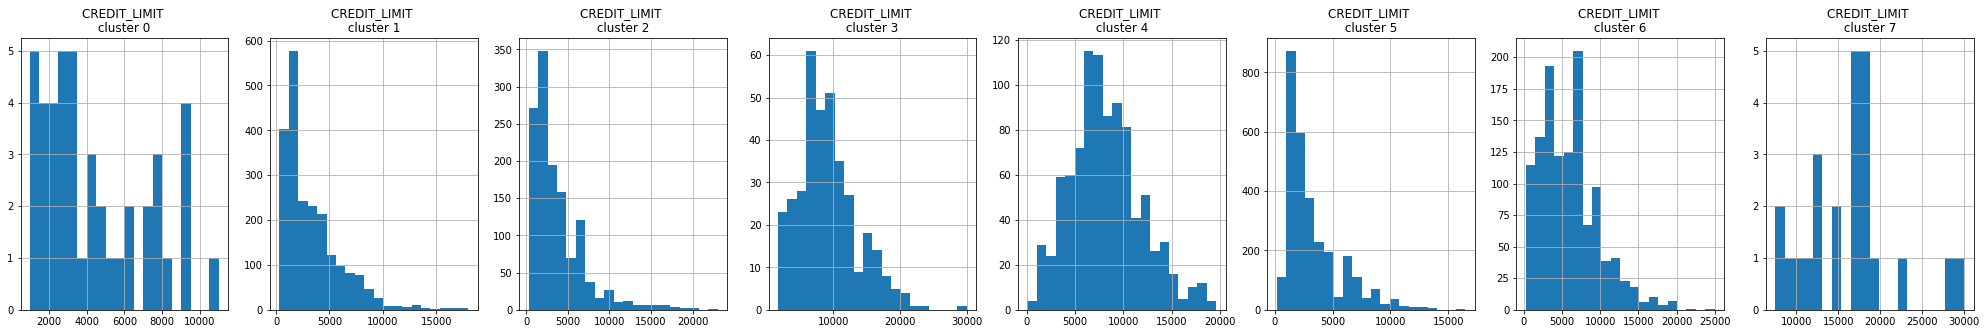

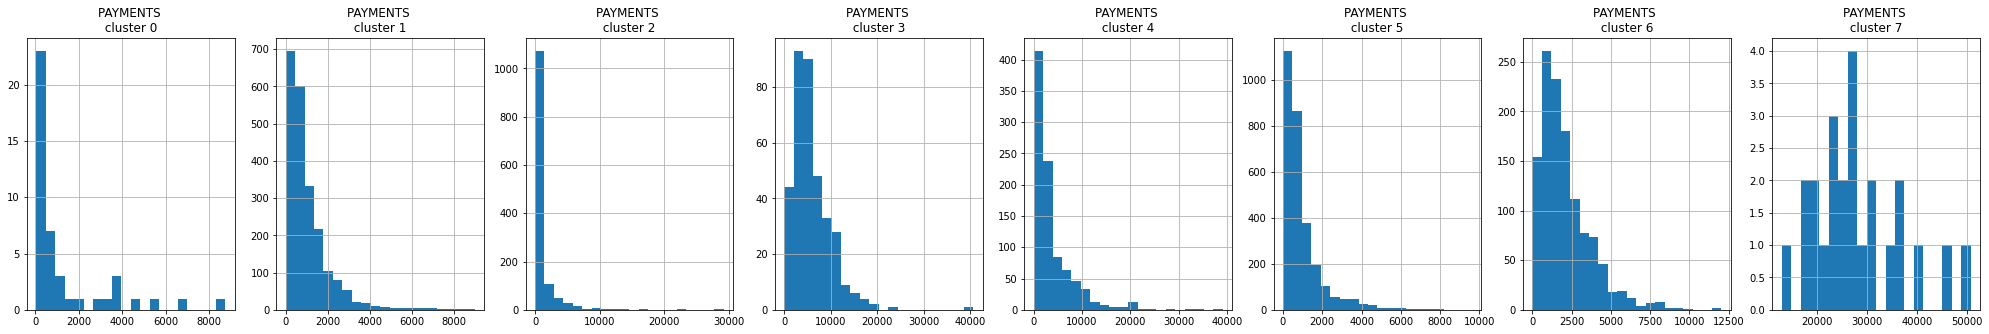

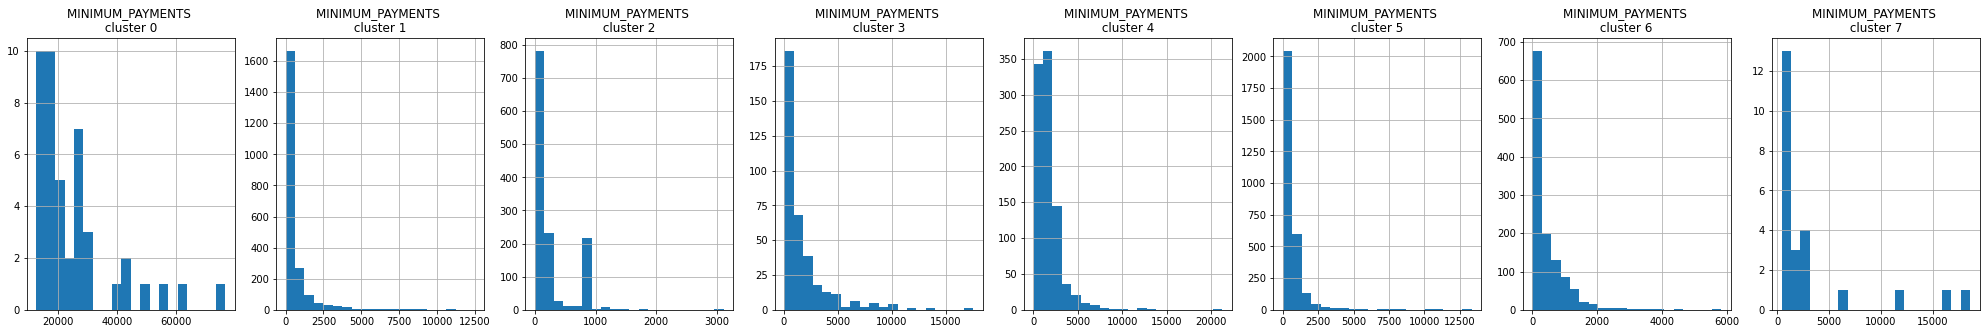

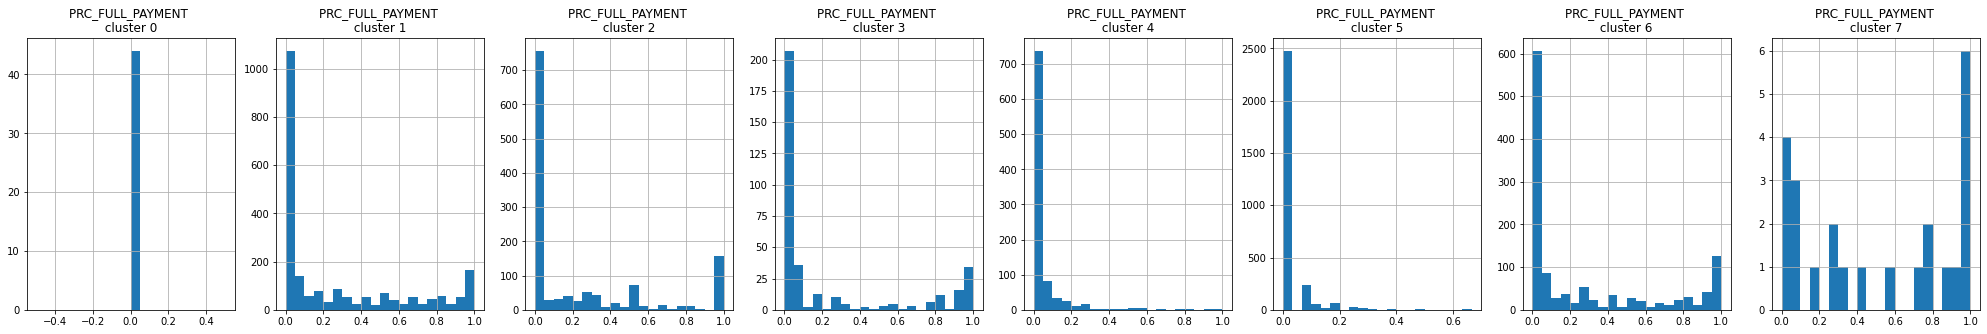

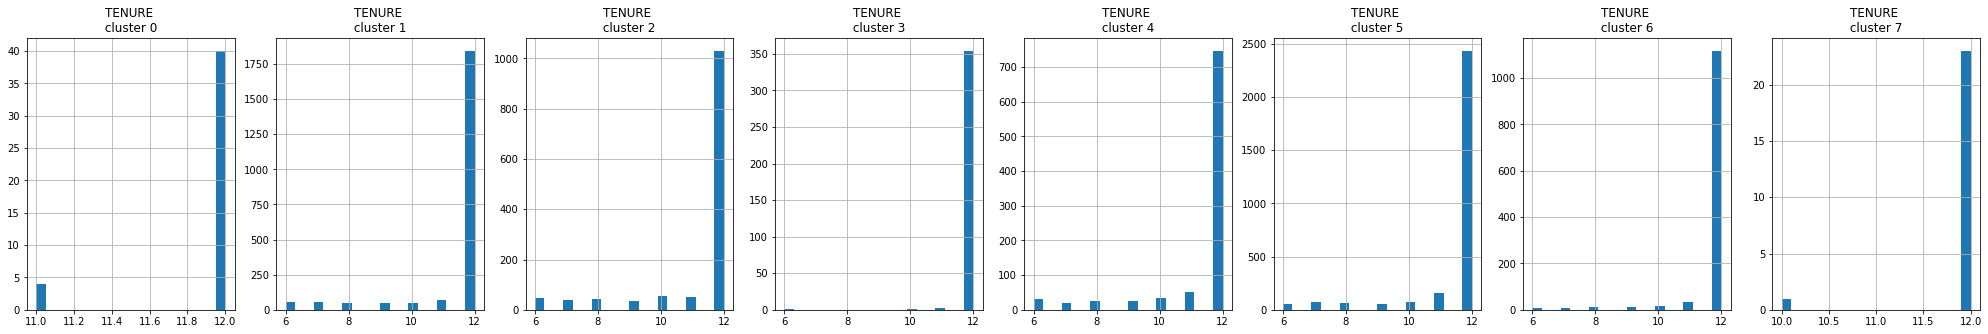

In [ ]:
# Let's put historgram of various clusters
for i in CreditCard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = CreditCard_df_cluster[CreditCard_df_cluster['CLUSTER'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \n cluster {} '.format(i, j))

plt.show()

### TASK#7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

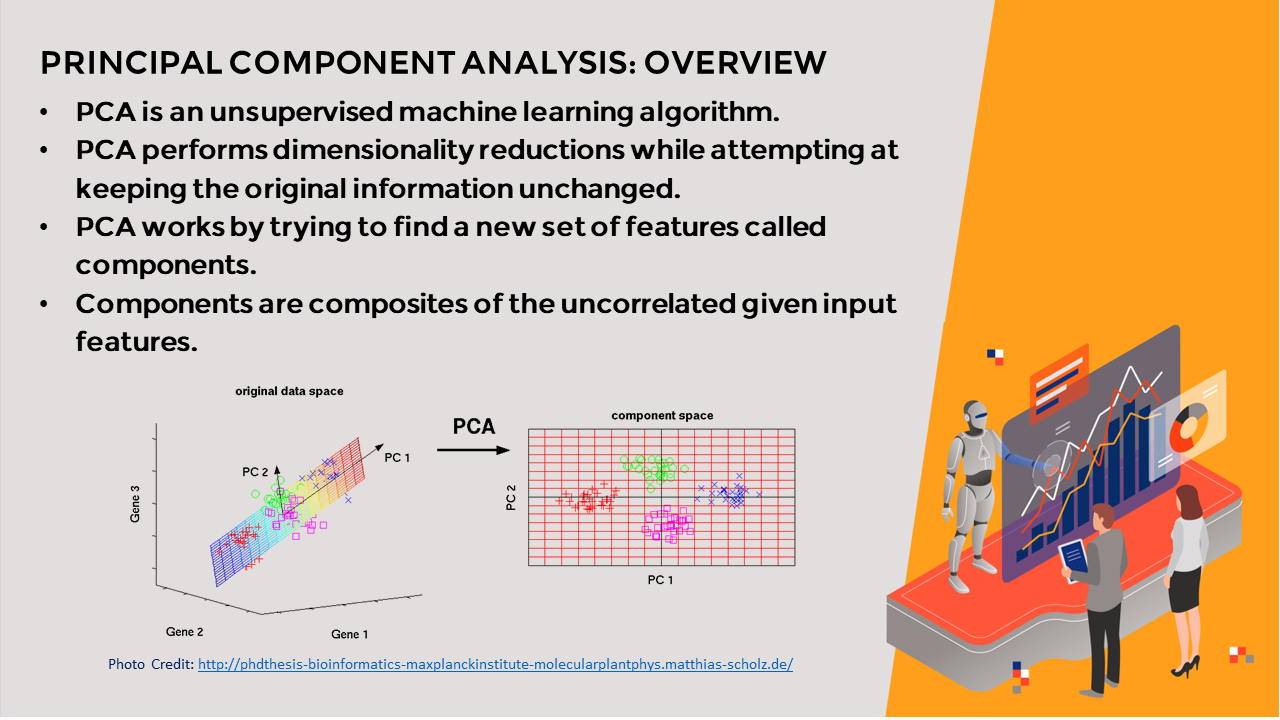

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(CreditCard_df_scaled)
principal_comp

array([[-1.6822203 , -1.07645174],
       [-1.13829463,  2.50648016],
       [ 0.96968969, -0.38349514],
       ...,
       [-0.9262039 , -1.81078909],
       [-2.33655332, -0.65797452],
       [-0.55642082, -0.40045796]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()


pca1      pca2
0 -1.682220 -1.076452
1 -1.138295  2.506480
2  0.969690 -0.383495
3 -0.873629  0.043158
4 -1.599433 -0.688580

In [ ]:
pca_df.shape

(8950, 2)

In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682220 -1.076452        5
1 -1.138295  2.506480        4
2  0.969690 -0.383495        6
3 -0.873629  0.043158        5
4 -1.599433 -0.688580        5

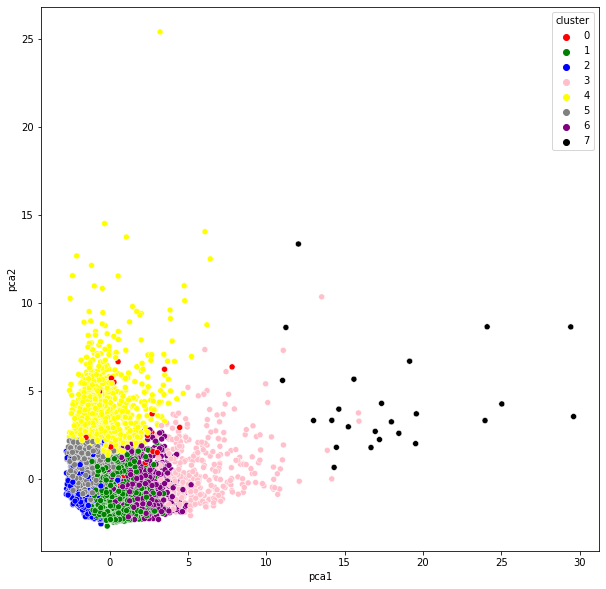

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

###TASK#8: **UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS**

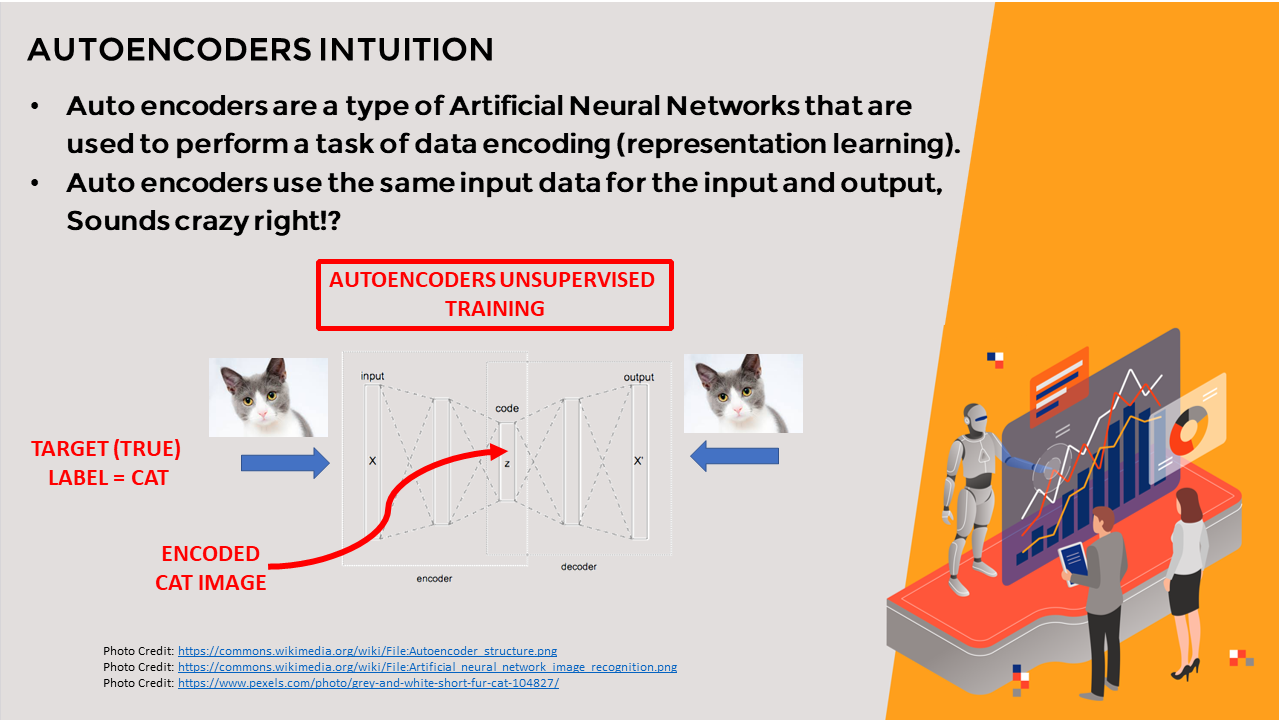

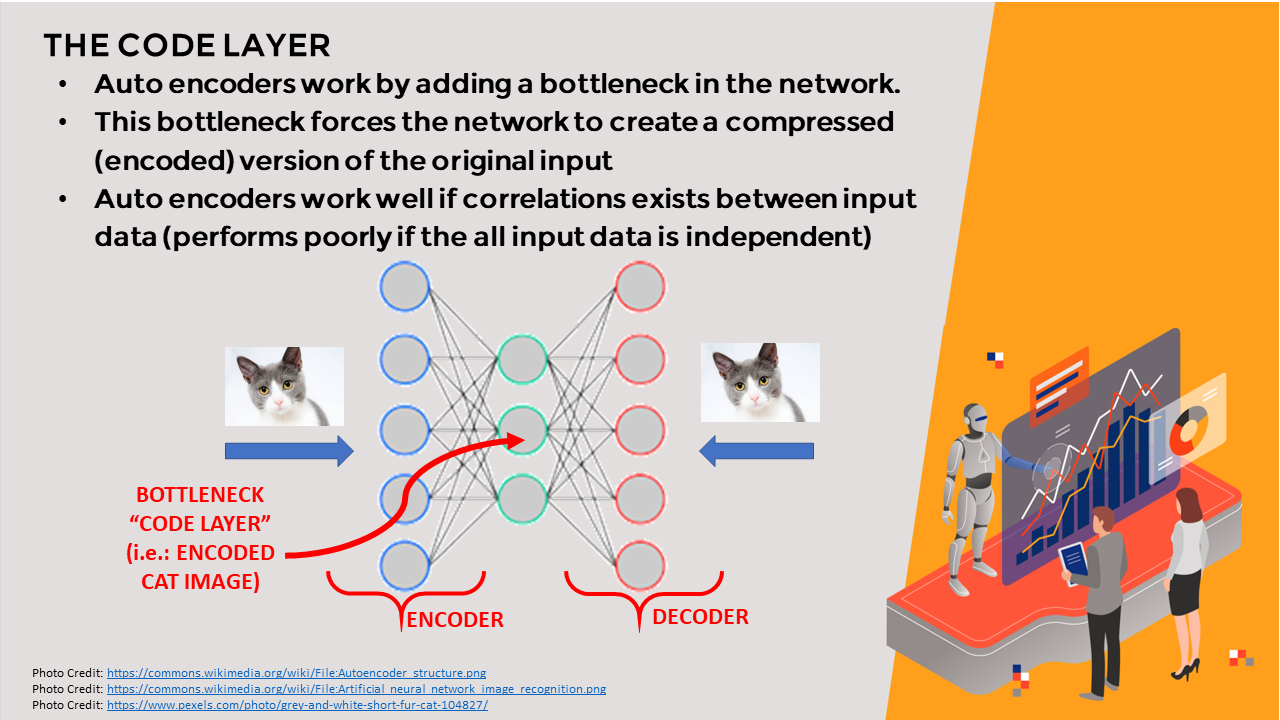

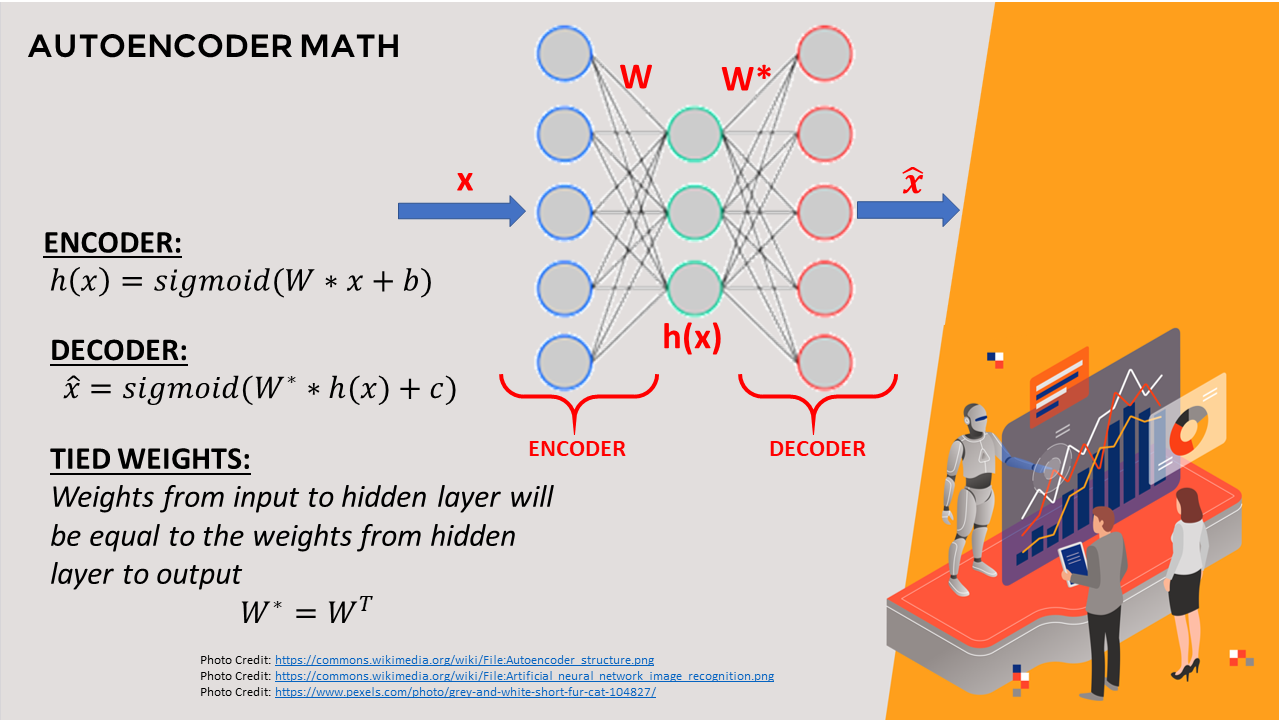

### TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [ ]:
CreditCard_df_scaled.shape

(8950, 17)

In [ ]:
autoencoder.fit(CreditCard_df_scaled, CreditCard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 4s 52ms/step - loss: 0.5641
Epoch 2/25
70/70 [==============================] - 3s 50ms/step - loss: 0.2805
Epoch 3/25
70/70 [==============================] - 4s 51ms/step - loss: 0.2081
Epoch 4/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1701
Epoch 5/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1679
Epoch 6/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1422
Epoch 7/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1323
Epoch 8/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1265
Epoch 9/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1075
Epoch 10/25
70/70 [==============================] - 4s 50ms/step - loss: 0.1064
Epoch 11/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1041
Epoch 12/25
70/70 [==============================] - 4s 53ms/step - loss: 0.0925
Epoch 13/25
70/70 [==================

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(CreditCard_df_scaled)

In [ ]:
pred.shape

(8950, 10)

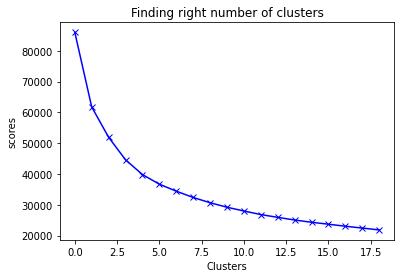

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

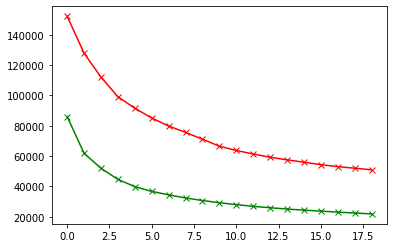

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(CreditCard_df_scaled)

In [ ]:
df_cluster_dr = pd.concat([CreditCard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  PRC_FULL_PAYMENT  TENURE  cluster
0    40.900749           0.818182      95.40  ...          0.000000      12        1
1  3202.467416           0.909091       0.00  ...          0.222222      12        1
2  2495.148862           1.000000     773.17  ...          0.000000      12        0
3  1666.670542           0.636364    1499.00  ...          0.000000      12        1
4   817.714335           1.000000      16.00  ...          0.000000      12        1

[5 rows x 18 columns]

In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -2.042229 -0.161250
1 -0.071290  1.334875
2  0.361506 -0.091200
3 -1.215500 -0.336718
4 -1.817151  0.096742

In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -2.042229 -0.161250        1
1 -0.071290  1.334875        1
2  0.361506 -0.091200        0
3 -1.215500 -0.336718        1
4 -1.817151  0.096742        1

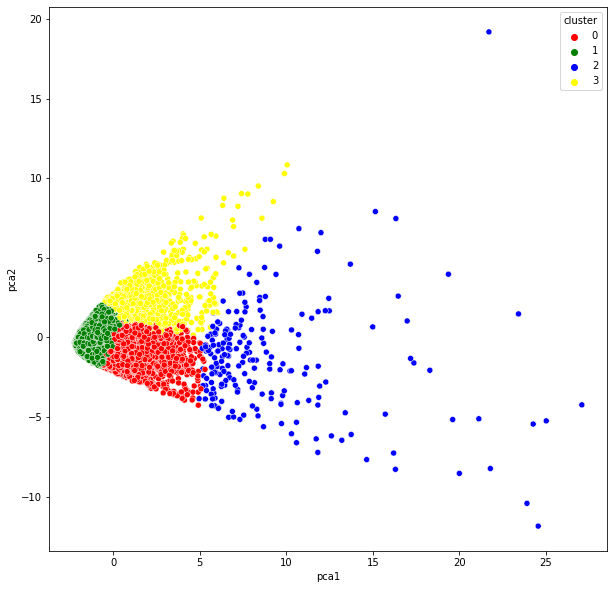

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

### **GREAT JOB!**
### **That's all about the project analysis and visualization**